In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
sys.path

['/home/cms-jovyan/SIDM/sidm/studies',
 '/home/cms-jovyan/SIDM/sidm/studies/../..',
 '/opt/conda/lib/python39.zip',
 '/opt/conda/lib/python3.9',
 '/opt/conda/lib/python3.9/lib-dynload',
 '',
 '/opt/conda/lib/python3.9/site-packages']

In [2]:
# python
import sys
import statistics
import os
import importlib
# columnar analysis
import awkward as ak
from dask.distributed import Client
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
import hist
import matplotlib
import matplotlib.patches as patches
import numpy
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities, cutflow, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
#utilities.set_plot_style()
%matplotlib inline

In [3]:
samples = []
bg_samples = [
    "TTJets",
]

#######################################################
SIDM_4mu_100GeV_0p25GeV_samples = [
    "4mu_100GeV_0p25GeV_0p02mm",
    "4mu_100GeV_0p25GeV_0p2mm",
    "4mu_100GeV_0p25GeV_2p0mm",
    "4mu_100GeV_0p25GeV_10p0mm",
    "4mu_100GeV_0p25GeV_20p0mm",
]
SIDM_4mu_100GeV_1p2GeV_samples = [
    "4mu_100GeV_1p2GeV_0p096mm",
    "4mu_100GeV_1p2GeV_0p96mm",
    "4mu_100GeV_1p2GeV_9p6mm",
    "4mu_100GeV_1p2GeV_48p0mm",
    "4mu_100GeV_1p2GeV_96p0mm",
]
SIDM_4mu_100GeV_5p0GeV_samples = [
    "4mu_100GeV_5p0GeV_0p4mm",
    "4mu_100GeV_5p0GeV_4p0mm",
    "4mu_100GeV_5p0GeV_40p0mm", 
    "4mu_100GeV_5p0GeV_200p0mm",
    "4mu_100GeV_5p0GeV_400p0mm",
]
#######################################################
SIDM_4mu_150GeV_0p25GeV_samples = [
    "4mu_150GeV_0p25GeV_0p013mm",
    "4mu_150GeV_0p25GeV_0p13mm",
    "4mu_150GeV_0p25GeV_1p3mm",
    "4mu_150GeV_0p25GeV_6p7mm",
    "4mu_150GeV_0p25GeV_13p0mm",
]
SIDM_4mu_150GeV_1p2GeV_samples = [
    "4mu_150GeV_1p2GeV_0p064mm",
    "4mu_150GeV_1p2GeV_0p64mm",
    "4mu_150GeV_1p2GeV_6p4mm",
    "4mu_150GeV_1p2GeV_32p0mm",
    "4mu_150GeV_1p2GeV_64p0mm",
]
SIDM_4mu_150GeV_5p0GeV_samples = [
    "4mu_150GeV_5p0GeV_0p27mm",
    "4mu_150GeV_5p0GeV_2p7mm",
    "4mu_150GeV_5p0GeV_27p0mm",
    "4mu_150GeV_5p0GeV_130p0mm",
    "4mu_150GeV_5p0GeV_270p0mm",
]
#######################################################
SIDM_4mu_200GeV_0p25GeV_samples = [
    "4mu_200GeV_0p25GeV_0p01mm",
    "4mu_200GeV_0p25GeV_0p1mm",
    "4mu_200GeV_0p25GeV_1p0mm",
    "4mu_200GeV_0p25GeV_5p0mm",
    "4mu_200GeV_0p25GeV_10p0mm",
]
SIDM_4mu_200GeV_1p2GeV_samples = [
    "4mu_200GeV_1p2GeV_0p048mm",
    "4mu_200GeV_1p2GeV_0p48mm",
    "4mu_200GeV_1p2GeV_4p8mm",
    "4mu_200GeV_1p2GeV_24p0mm",
    "4mu_200GeV_1p2GeV_48p0mm",
]
SIDM_4mu_200GeV_5p0GeV_samples = [
    "4mu_200GeV_5p0GeV_0p2mm",
    "4mu_200GeV_5p0GeV_2p0mm",
    "4mu_200GeV_5p0GeV_20p0mm",
    "4mu_200GeV_5p0GeV_100p0mm",
    "4mu_200GeV_5p0GeV_200p0mm",
]
#######################################################
SIDM_4mu_500GeV_0p25GeV_samples = [
    "4mu_500GeV_0p25GeV_0p004mm",
    "4mu_500GeV_0p25GeV_0p04mm",
    "4mu_500GeV_0p25GeV_0p4mm",
    "4mu_500GeV_0p25GeV_2p0mm",
    "4mu_500GeV_0p25GeV_4p0mm",
]
SIDM_4mu_500GeV_1p2GeV_samples = [
    "4mu_500GeV_1p2GeV_0p019mm",
    "4mu_500GeV_1p2GeV_0p19mm",
    "4mu_500GeV_1p2GeV_1p9mm",
    "4mu_500GeV_1p2GeV_9p6mm",
    "4mu_500GeV_1p2GeV_19p0mm",
]
SIDM_4mu_500GeV_5p0GeV_samples = [
    "4mu_500GeV_5p0GeV_0p08mm",
    "4mu_500GeV_5p0GeV_0p8mm",
    "4mu_500GeV_5p0GeV_8p0mm",
    "4mu_500GeV_5p0GeV_40p0mm",
    "4mu_500GeV_5p0GeV_80p0mm",
    
    #"4mu_500GeV_5p0GeV_800p0mm",
    #"4mu_500GeV_5p0GeV_8000p0mm", these are also here as long Lxy tests
]
#######################################################
SIDM_4mu_800GeV_0p25GeV_samples = [
    "4mu_800GeV_0p25GeV_0p0025mm",
    "4mu_800GeV_0p25GeV_0p025mm",
    "4mu_800GeV_0p25GeV_0p25mm",
    "4mu_800GeV_0p25GeV_1p2mm",
    "4mu_800GeV_0p25GeV_2p5mm",
]
SIDM_4mu_800GeV_1p2GeV_samples = [
    "4mu_800GeV_1p2GeV_0p012mm",
    "4mu_800GeV_1p2GeV_0p12mm",
    "4mu_800GeV_1p2GeV_1p2mm",
    "4mu_800GeV_1p2GeV_6p0mm",
    "4mu_800GeV_1p2GeV_12p0mm",
]
SIDM_4mu_800GeV_5p0GeV_samples = [
    "4mu_800GeV_5p0GeV_0p05mm",
    "4mu_800GeV_5p0GeV_0p5mm",
    "4mu_800GeV_5p0GeV_5p0mm",
    "4mu_800GeV_5p0GeV_25p0mm",
    "4mu_800GeV_5p0GeV_50p0mm",
]
#######################################################
SIDM_4mu_1000GeV_0p25GeV_samples = [ # getting keyErrors on all of these; I think they might be empty
    "4mu_1000GeV_0p25GeV_0p002mm", # Running gives "cannot unpack non-iterable NoneType object"
    "4mu_1000GeV_0p25GeV_0p02mm",
    "4mu_1000GeV_0p25GeV_0p2mm",
    "4mu_1000GeV_0p25GeV_1p0mm",
    "4mu_1000GeV_0p25GeV_2p0mm",
]
SIDM_4mu_1000GeV_1p2GeV_samples = [ # these also give keyErrors
    "4mu_1000GeV_1p2GeV_0p0096mm",
    "4mu_1000GeV_1p2GeV_0p096mm",
    "4mu_1000GeV_1p2GeV_0p96mm",
    "4mu_1000GeV_1p2GeV_4p8mm",
    "4mu_1000GeV_1p2GeV_9p6mm",
]
SIDM_4mu_1000GeV_5p0GeV_samples = [
    "4mu_1000GeV_5p0GeV_0p04mm",
    "4mu_1000GeV_5p0GeV_0p4mm",
    "4mu_1000GeV_5p0GeV_4p0mm",
    "4mu_1000GeV_5p0GeV_20p0mm",
    "4mu_1000GeV_5p0GeV_40p0mm",
]
#######################################################


SIDM_4mu_100GeV_samples = []
SIDM_4mu_100GeV_samples = SIDM_4mu_100GeV_samples + SIDM_4mu_100GeV_0p25GeV_samples + SIDM_4mu_100GeV_1p2GeV_samples + SIDM_4mu_100GeV_5p0GeV_samples

SIDM_4mu_150GeV_samples = []
SIDM_4mu_150GeV_samples = SIDM_4mu_150GeV_samples + SIDM_4mu_150GeV_0p25GeV_samples + SIDM_4mu_150GeV_1p2GeV_samples + SIDM_4mu_150GeV_5p0GeV_samples

SIDM_4mu_200GeV_samples = []
SIDM_4mu_200GeV_samples = SIDM_4mu_200GeV_samples + SIDM_4mu_200GeV_0p25GeV_samples + SIDM_4mu_200GeV_1p2GeV_samples + SIDM_4mu_200GeV_5p0GeV_samples

SIDM_4mu_500GeV_samples = []
SIDM_4mu_500GeV_samples = SIDM_4mu_500GeV_samples + SIDM_4mu_500GeV_0p25GeV_samples + SIDM_4mu_500GeV_1p2GeV_samples + SIDM_4mu_500GeV_5p0GeV_samples

SIDM_4mu_800GeV_samples = []
SIDM_4mu_800GeV_samples = SIDM_4mu_800GeV_samples + SIDM_4mu_800GeV_0p25GeV_samples + SIDM_4mu_800GeV_1p2GeV_samples + SIDM_4mu_800GeV_5p0GeV_samples

SIDM_4mu_1000GeV_samples = []
SIDM_4mu_1000GeV_samples = SIDM_4mu_1000GeV_samples + SIDM_4mu_1000GeV_0p25GeV_samples + SIDM_4mu_1000GeV_1p2GeV_samples + SIDM_4mu_1000GeV_5p0GeV_samples

samples_sublists = [
    SIDM_4mu_100GeV_0p25GeV_samples, SIDM_4mu_100GeV_1p2GeV_samples, SIDM_4mu_100GeV_5p0GeV_samples, 
    SIDM_4mu_150GeV_0p25GeV_samples, SIDM_4mu_150GeV_1p2GeV_samples, SIDM_4mu_150GeV_5p0GeV_samples,
    SIDM_4mu_200GeV_0p25GeV_samples, SIDM_4mu_200GeV_1p2GeV_samples, SIDM_4mu_200GeV_5p0GeV_samples, 
    SIDM_4mu_500GeV_0p25GeV_samples, SIDM_4mu_500GeV_1p2GeV_samples, SIDM_4mu_500GeV_5p0GeV_samples,
    SIDM_4mu_800GeV_0p25GeV_samples, SIDM_4mu_800GeV_1p2GeV_samples, SIDM_4mu_800GeV_5p0GeV_samples,
    #SIDM_4mu_1000GeV_0p25GeV_samples, 
    SIDM_4mu_1000GeV_1p2GeV_samples, # These two groups don't work at all
    SIDM_4mu_1000GeV_5p0GeV_samples,
    ]

In [4]:
samples = []
samples = samples + bg_samples
#for sublist in samples_sublists:
#    print(sublist[0])
#    samples = samples + [sublist[0]]
samples = samples + SIDM_4mu_100GeV_samples + SIDM_4mu_800GeV_samples
print(samples)

['TTJets', '4mu_100GeV_0p25GeV_0p02mm', '4mu_100GeV_0p25GeV_0p2mm', '4mu_100GeV_0p25GeV_2p0mm', '4mu_100GeV_0p25GeV_10p0mm', '4mu_100GeV_0p25GeV_20p0mm', '4mu_100GeV_1p2GeV_0p096mm', '4mu_100GeV_1p2GeV_0p96mm', '4mu_100GeV_1p2GeV_9p6mm', '4mu_100GeV_1p2GeV_48p0mm', '4mu_100GeV_1p2GeV_96p0mm', '4mu_100GeV_5p0GeV_0p4mm', '4mu_100GeV_5p0GeV_4p0mm', '4mu_100GeV_5p0GeV_40p0mm', '4mu_100GeV_5p0GeV_200p0mm', '4mu_100GeV_5p0GeV_400p0mm', '4mu_800GeV_0p25GeV_0p0025mm', '4mu_800GeV_0p25GeV_0p025mm', '4mu_800GeV_0p25GeV_0p25mm', '4mu_800GeV_0p25GeV_1p2mm', '4mu_800GeV_0p25GeV_2p5mm', '4mu_800GeV_1p2GeV_0p012mm', '4mu_800GeV_1p2GeV_0p12mm', '4mu_800GeV_1p2GeV_1p2mm', '4mu_800GeV_1p2GeV_6p0mm', '4mu_800GeV_1p2GeV_12p0mm', '4mu_800GeV_5p0GeV_0p05mm', '4mu_800GeV_5p0GeV_0p5mm', '4mu_800GeV_5p0GeV_5p0mm', '4mu_800GeV_5p0GeV_25p0mm', '4mu_800GeV_5p0GeV_50p0mm']


In [5]:
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=10)

In [6]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
hist_choice = "base"
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
p = sidm_processor.SidmProcessor(
    [
        "base",
        "baseNoLj",
        "4mu", # basic cuts + 4mu requirement
        "2mu2e",
        "matchedLj", # strict cuts on lj objects
        "4mu_matchedLj",
    ],
    [hist_choice],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)
output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel baseNoLj

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

In [7]:
cutflow.print_multi_table([out[samples[i]]["cutflow"]["2mu2e"] for i in range(5)], [samples[i] for i in range(5)], fraction=False, unweighted=False)


cut name        Total cuts:                  Total cuts:                 Total cuts:                 Total cuts:                  Total cuts:
                      TTJets    4mu_100GeV_0p25GeV_0p02mm    4mu_100GeV_0p25GeV_0p2mm    4mu_100GeV_0p25GeV_2p0mm    4mu_100GeV_0p25GeV_10p0mm
------------  --------------  ---------------------------  --------------------------  --------------------------  ---------------------------
No selection       402863.00                     52591.00                    52727.00                    46066.00                     44048.00
PV filter          402048.00                     52371.00                    52484.00                    45714.00                     43341.00
>=2 LJs              5341.00                      3149.00                     2987.00                     2689.00                      2456.00
2mu2e                  63.00                         7.00                        8.00                       11.00                         8.00

In [8]:
out[samples[0]]["cutflow"]["4mu"].print_table(fraction=False, unweighted=False)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection            402863.0     402863.0
PV filter               402048.0     402048.0
>=2 LJs                   5354.0       5341.0
4mu                          7.0          7.0


5341.0


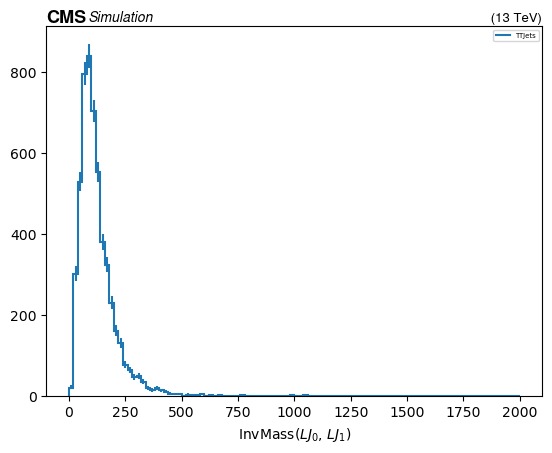

In [9]:
#out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :].plot2d_full()

a = out[samples[0]]["hists"]["lj_lj_invmass"]["base", :]
utilities.plot(a, flow='none', density=False)
plt.legend([samples[0]], loc=1, prop={'size': 5}, ncol=2)
print(a.to_numpy()[0].sum())

Plots several different histograms for all samples. It is clear from these that the 4mu samples (of course) don't have electrons or photons, and are almost all composed of four muons. Under the matchedLj channel, the lepton jet object cuts are more strict than those of the 4mu or llpnano channels, so the number of cut events is higher on the >=2 lj cut (since there are fewer objects qualifying as lepton jets). The background cannot be analyzed in this channel, since one of the cuts requires >= 2 matched dark photons ("As"), which are gen-level particles. Since the background does not generate dark photons, none of the events have these As, so they are all cut.

In the low-mass (100GeV) samples of dark matter bound states, the number of dsa muons is relatively low, with most samples having only zero or one.

In high-mass cases (1000GeV), the more displaced samples are much less clustered around 4 muons, with a significant number of events having only three or less. These same samples were also more likely to have one or more dsa muons. I'm not sure if these are counted separately by the muon_n histogram.

In [10]:
def count1d(hist, bounds, verbose = False):
    result = 0
    x = hist.to_numpy()
    bins = []
    for i in range(len(x[0])):
        temp = [x[0][i], (x[1][i]+x[1][i+1])/2]
        bins.append(temp)
    for i in range(len(bins)):
        if bins[i][1] >= min(bounds[0]) and bins[i][1] <= max(bounds[0]):
            result += bins[i][0]
    return result

def count2d(hist, bounds, verbose = False):
    result = 0
    if type(hist) != numpy.ndarray: 
        x = hist.to_numpy()
    else:
        x = hist
    bins = []
    for i in range(len(x[2]) - 1): # each i corresponds to a row of bins
        for j in range(len(x[1]) - 1): # each j corresponds to the column
            bins.append([x[0][j][i], (x[1][j] + x[1][j+1])/2, (x[2][i] + x[2][i+1])/2])
    for i in range(len(bins)):
        if bins[i][1] >= bounds[0][0] and bins[i][1] <= bounds[1][0] and bins[i][2] >= bounds[0][1] and bins[i][2] <= bounds[1][1]:
            if verbose: print(bins[i])
            result += bins[i][0]
    return result

def drawRect(fig, ax, x0, x1, color='r'):
    ax.add_patch(patches.Rectangle((x0[0], x0[1]), abs(x0[0]-x1[0]), abs(x0[1]-x1[1]), linewidth=1, edgecolor=color, facecolor='none'))
    fig.show()
    
def countPlot(hist, fig, ax, bounds, color='r'):
    dim = len(hist.axes) if isinstance(hist, list) else len(hist.axes)
    if dim == 1:
        fig.axvline(x = bounds[0])
        fig.axvline(x = bounds[1])
    if dim == 2:
        drawRect(fig, ax, bounds[0], bounds[1], color)
    fig.show()
    return count(hist, bounds)
    
def countAll(hist, verbose=False):
    result = 0
    dim = len(hist.axes) if isinstance(hist, list) else len(hist.axes)
    if dim == 2:
        x = hist.to_numpy()
        bins = []
        for i in range(len(x[2]) - 1): # each i corresponds to a row of bins
            for j in range(len(x[1]) - 1): # each j corresponds to the column
                bins.append([x[0][j][i], (x[1][j] + x[1][j+1])/2, (x[2][i] + x[2][i+1])/2])
        for i in range(len(bins)):
            if verbose: print(bins[i])
            result += bins[i][0]
    return result
                
def ABCD(hist, fig, ax, x0, x1):
    lowX = x0[0]
    lowY = x0[1]
    midX = (x0[0] + x1[0]) / 2
    midY = (x0[1] + x1[1]) / 2
    highX = x1[0]
    highY = x1[1]
    
    xrange = midX-lowX
    yrange = midY-lowY
    
    drawRect(fig, ax, x0, (midX, midY), 'yellow') # C
    drawRect(fig, ax, (midX, lowY), (highX, midY), 'green') # D
    drawRect(fig, ax, (lowX, midY), (midX, highY), 'red') # A
    drawRect(fig, ax, (midX, midY), (highX, highY), 'orange') # B
    
    ax.text(lowX + 0.2*xrange, midY - 0.1*yrange, "C", fontsize=11, color='yellow')
    ax.text(midX + 0.2*xrange, midY - 0.1*yrange, "D", fontsize=11, color='green')
    ax.text(lowX + 0.2*xrange, highY - 0.1*yrange, "A", fontsize=11, color='red')
    ax.text(midX + 0.2*xrange, highY - 0.1*yrange, "B", fontsize=11, color='orange')
    
    countA = count2d(hist, [(lowX, midY), (midX, highY)])
    countB = count2d(hist, [(midX, midY), x1])
    countC = count2d(hist, [x0, (midX, midY)])
    countD = count2d(hist, [(midX, lowY), (highX, midY)])
    
    return [countA, countB, countC, countD]

def addHistDensities(hist1, hist2, scalar=1): 
    result = hist1/hist1.sum().value + hist2/hist2.sum().value * scalar
    result = result/result.sum().value
    return result

Points used are: (20, 2.25), (160.0, 4)
Events within the rectangle: 38555.0


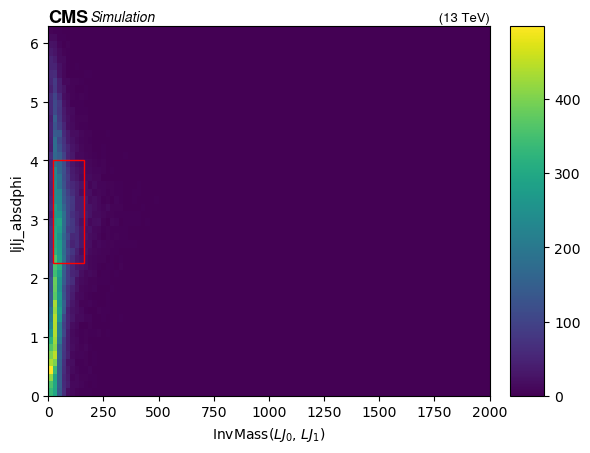

In [11]:
fig, ax = plt.subplots()
a = out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["baseNoLj", :, :]
x = a.to_numpy()
utilities.plot(a)
x0 = (20, 0.5)
x1 = (300, 4) # bins[i] = [events, x (invmass), y (dPhi)]
x2 = ((x0[0]+x1[0])/2, (x0[1]+x1[1])/2)
#drawRect(fig, ax, x0, x1)
drawRect(fig, ax, (x0[0], x2[1]), (x2[0], x1[1]))
#print(f"Events: {countPlot(a, fig, ax, [(x0[0], x2[1]), (x2[0], x1[1])])}")
print(f"Points used are: ({x0[0]}, {x2[1]}), ({x2[0]}, {x1[1]})")
print(f"Events within the rectangle: {countAll(a)}")

TTJets counts in each region [A, B, C, D]: [1692.0, 0.0, 3648.0, 1.0]
Ratios:
	A:B = 1692000.0
	C:D = 3648.0
	A:B/C:D = 463.8157894736842 = 1/0.00
-----------------------------------------

Events in the histogram: 5341.0


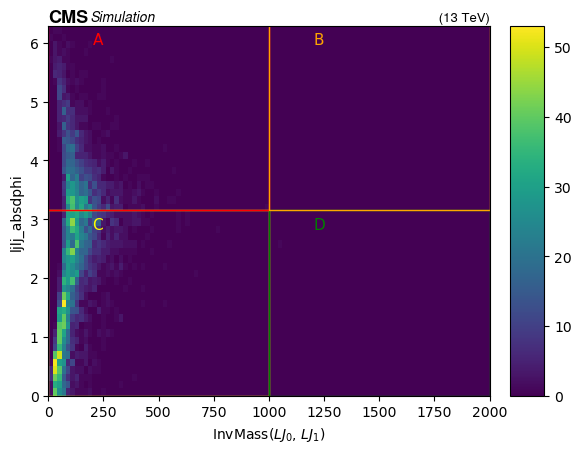

In [12]:
fig, (ax1) = plt.subplots()
a = out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :]

x0 = (0, 0)
x1 = (2000, 6.3)
x2 = ((x0[0]+x1[0])/2,(x0[1]+x1[1])/2)
#print(x2)

utilities.plot(a)
counts = ABCD(a, fig, ax1, x0, x1) # pass ABCD() a rectangle, and it is divided into 4 equal parts

fig.show()
    # Displays ABCD in order red, orange, yellow, green
print(f"{samples[0]} counts in each region [A, B, C, D]: {counts}")
if counts[1]==0:
    counts[1]=0.001
if counts[3]==0:
    counts[3]=0.001
A_to_B = counts[0]/counts[1]
C_to_D = counts[2]/counts[3]
print(f"Ratios:\n\tA:B = {A_to_B}\n\tC:D = {C_to_D}\n\tA:B/C:D = {A_to_B/C_to_D} = 1/{1/(A_to_B/C_to_D):.2f}\n-----------------------------------------\n")
print(f"Events in the histogram: {countAll(a, verbose=False)}")

TTJets counts in each region [A, B, C, D]: [2587.0, 13.0, 2489.0, 3.0]
Ratios:
	A:B = 199.0
	C:D = 829.6666666666666
	A:B/C:D = 0.2398553635998393 = 1/4.17
-----------------------------------------

4mu_100GeV_1p2GeV_96p0mm counts in each region [A, B, C, D]: [21416.0, 4.0, 1255.0, 0.0]
Ratios:
	A:B = 0.00018677624206200972
	C:D = 7.96812749003984e-07
	A:B/C:D = 0.00426613545816733 = 1/234.40
-----------------------------------------

Total Counts in each region: [24003.0, 17.0, 3744.0, 3.001]
Ratios:
	A:B = 0.0007082448027329916
	C:D = 0.0008015491452991453
	A:B/C:D = 1.1317402432126695 = 1/0.88
-----------------------------------------



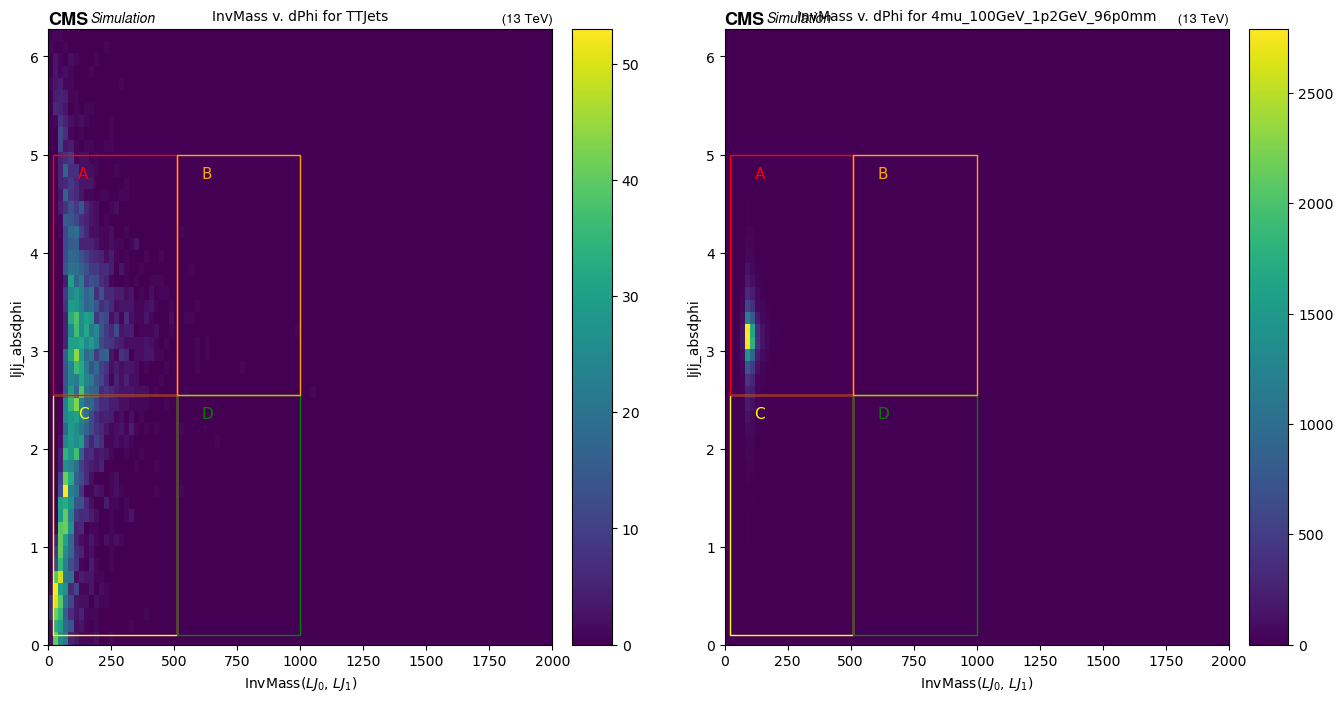

In [13]:
ind = 10

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
a = out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :]
b = out[samples[ind]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :]

x0 = (20, 0.1)
x1 = (1000, 5)
x2 = ((x0[0]+x1[0])/2,(x0[1]+x1[1])/2)
#print(x2)

plt.subplot(1,2,1)
utilities.plot(a)
counts = ABCD(a, fig, ax1, x0, x1) # pass ABCD() a rectangle, and it is divided into 4 equal parts

plt.subplot(1,2,2)
utilities.plot(b)
counts2 = ABCD(b, fig, ax2, x0, x1)

fig.show()
    # Displays ABCD in order red, orange, yellow, green
print(f"{samples[0]} counts in each region [A, B, C, D]: {counts}")
if counts[1]==0:
    counts[1]=0.001
if counts[3]==0:
    counts[3]=0.001
A_to_B = counts[0]/counts[1]
C_to_D = counts[2]/counts[3]
print(f"Ratios:\n\tA:B = {A_to_B}\n\tC:D = {C_to_D}\n\tA:B/C:D = {A_to_B/C_to_D} = 1/{1/(A_to_B/C_to_D):.2f}\n-----------------------------------------\n")

print(f"{samples[ind]} counts in each region [A, B, C, D]: {counts2}")
if counts2[1]==0:
    counts2[1]=0.001
if counts2[3]==0:
    counts2[3]=0.001
A_to_B2 = counts2[0]/counts2[1]
C_to_D2 = counts2[2]/counts2[3]
print(f"Ratios:\n\tA:B = {1/A_to_B2}\n\tC:D = {1/C_to_D2}\n\tA:B/C:D = {(A_to_B2/C_to_D2)} = 1/{1/(A_to_B2/C_to_D2):.2f}\n-----------------------------------------\n")

ax1.title.set_text(f"InvMass v. dPhi for {samples[0]}")
ax1.title.set_size(10)
ax2.title.set_text(f"InvMass v. dPhi for {samples[ind]}")
ax2.title.set_size(10)

totalCounts = [counts[i]+counts2[i] for i in range(len(counts))]
print(f"Total Counts in each region: {totalCounts}")
if totalCounts[1]==0:
    totalCounts[1]=0.001
if totalCounts[3]==0:
    totalCounts[3]=0.001
A_to_Btotal = totalCounts[0]/totalCounts[1]
C_to_Dtotal = totalCounts[2]/totalCounts[3]
totalRat = (A_to_Btotal/C_to_Dtotal)
print(f"Ratios:\n\tA:B = {1/A_to_Btotal}\n\tC:D = {1/C_to_Dtotal}\n\tA:B/C:D = {totalRat} = 1/{1/(totalRat):.2f}\n-----------------------------------------\n")


(635.0, 2.05)
[4220.0, 3077.0, 81.0, 42.0]
Ratios: A:B = 1.3714657133571662, C:D = 1.9285714285714286


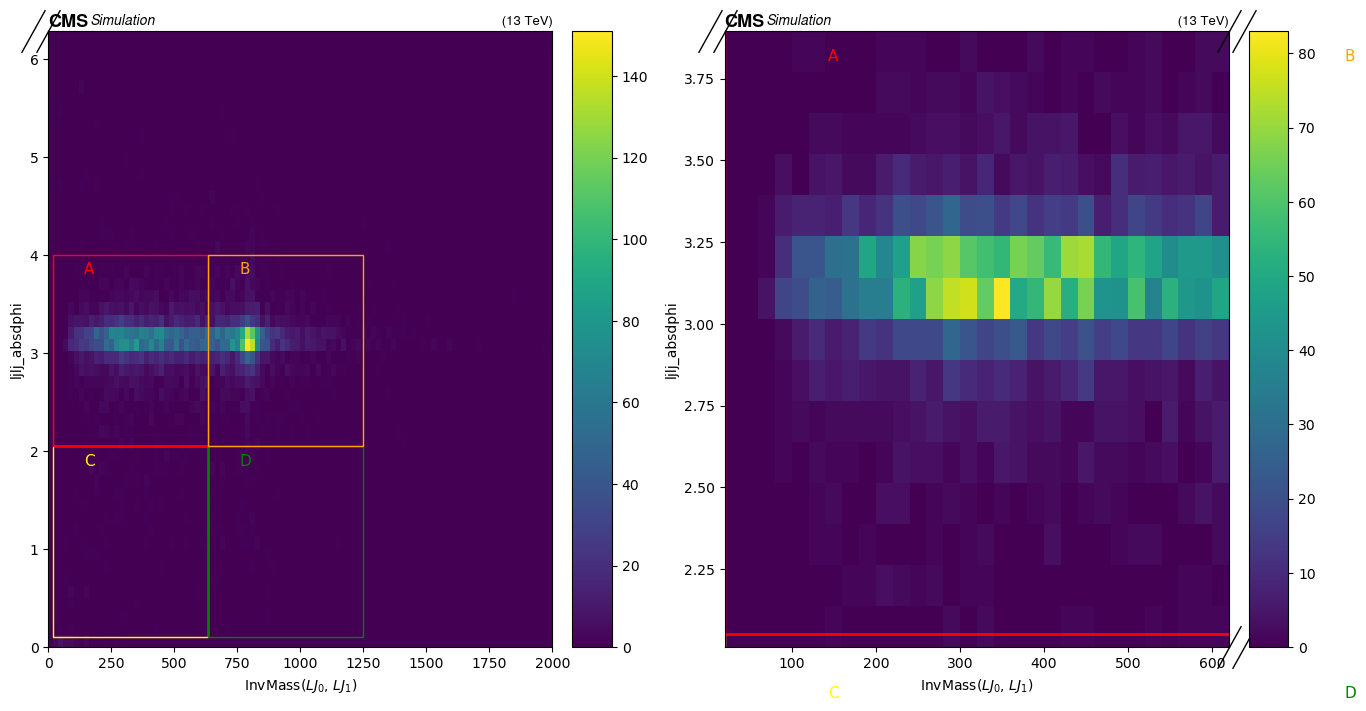

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplot(1,2,1)
a = out[samples[-1]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :]
utilities.plot(a)
x0 = (20, 0.1)
x1 = (1250, 4)
x2 = ((x0[0]+x1[0])/2,(x0[1]+x1[1])/2)
print(x2)
counts = ABCD(a, fig, ax1, x0, x1) # pass ABCD() a rectangle, and it is divided into 4 equal parts

fig.show()
# Displays in order red, orange, yellow, green
print(counts)
A_to_B = counts[0]/counts[1]
C_to_D = counts[2]/counts[3]
print(f"Ratios: A:B = {A_to_B}, C:D = {C_to_D}")

plt.subplot(1,2,2)
b = out[samples[-1]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", 20j:635j, 2.05j:4j]
utilities.plot(b)

counts = ABCD(b, fig, ax2, x0, x1)

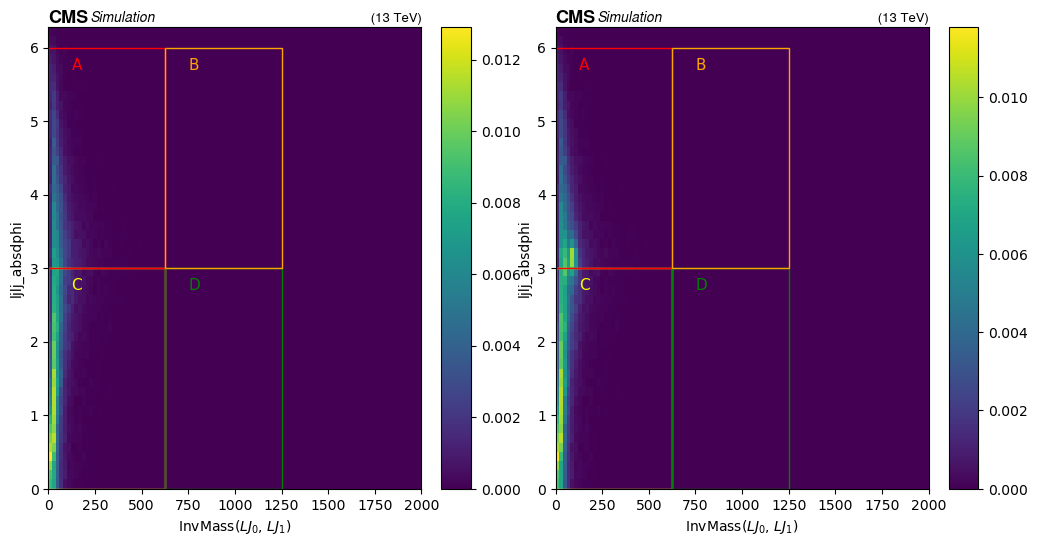

Background counts in each region [A, B, C, D]: [0.3123, 0.0001, 0.6865, 0.0001]
Ratios:
	A:B = 6019.499999999978
	C:D = 6617.249999999983
	A:B/C:D = 0.9096679134081369 = 1/1.10
-----------------------------------------

Events in the entire histogram: 1.0000
Total (TTJets + 4mu_100GeV_1p2GeV_96p0mm) counts in each region [A, B, C, D]: [0.3439, 0.0001, 0.6550, 0.0001]
Ratios:
	A:B = 6668.380722744476
	C:D = 6944.562716955938
	A:B/C:D = 0.9602304701580227 = 1/1.04
-----------------------------------------

Events in the entire histogram: 1.0000
Expected background: 0.3432628712229274
Actual background: 0.31225521981584636
Actual A counts: 0.3438999388785901
Ratio (expected):(actual+signal) = 1.0018559177501285


In [36]:
ind = 10
scalar = 0.1

a = out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["baseNoLj", :, :]
b = out[samples[ind]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["baseNoLj", :, :]
#c = a/a.sum().value + b/b.sum().value * scalar
#c = c/c.sum().value
c = addHistDensities(a, b, scalar = scalar)
a = a/a.sum().value
#X, Y = numpy.meshgrid(c[1], c[2])
#Z = c[0]
x0 = (0, 0)
x1 = (1250, 6)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
#t = ax.pcolormesh(X, Y, Z, vmin=Z.min(), vmax=Z.max())
plt.subplot(1,2,1)
utilities.plot(a, flow=False)
bgcounts = ABCD(a, fig, ax1, x0, x1)
plt.subplot(1,2,2)
utilities.plot(c, flow=False)

counts = ABCD(c, fig, ax2, x0, x1)
ax.set_title(f"TTBar Background + {samples[ind]} Signal")
ax.title.set_size(6)
#fig.colorbar(t, ax=ax)
plt.show()

print(f"Background counts in each region [A, B, C, D]: [{bgcounts[0]:.4f}, {bgcounts[1]:.4f}, {bgcounts[2]:.4f}, {bgcounts[3]:.4f}]")
if bgcounts[1]==0:
    bgcounts[1]=0.001
if bgcounts[3]==0:
    bgcounts[3]=0.001
bgA_to_B = bgcounts[0]/bgcounts[1]
bgC_to_D = bgcounts[2]/bgcounts[3]
print(f"Ratios:\n\tA:B = {bgA_to_B}\n\tC:D = {bgC_to_D}\n\tA:B/C:D = {bgA_to_B/bgC_to_D} = 1/{1/(bgA_to_B/bgC_to_D):.2f}\n-----------------------------------------\n")
print(f"Events in the entire histogram: {countAll(a, verbose=False):.4f}")

print(f"Total ({samples[0]} + {samples[ind]}) counts in each region [A, B, C, D]: [{counts[0]:.4f}, {counts[1]:.4f}, {counts[2]:.4f}, {counts[3]:.4f}]")
if counts[1]==0:
    counts[1]=0.0001
if counts[3]==0:
    counts[3]=0.0001
A_to_B = counts[0]/counts[1]
C_to_D = counts[2]/counts[3]
print(f"Ratios:\n\tA:B = {A_to_B}\n\tC:D = {C_to_D}\n\tA:B/C:D = {A_to_B/C_to_D} = 1/{1/(A_to_B/C_to_D):.2f}\n-----------------------------------------\n")
print(f"Events in the entire histogram: {countAll(c, verbose=False):.4f}")

#Signal region is A
# Expected value for BC/D = A
A_expected = bgcounts[1]*bgcounts[2]/bgcounts[3]
print(f"Expected background: {A_expected}")
print(f"Actual background: {bgcounts[0]}")
print(f"Actual A counts: {counts[0]}")
print(f"Ratio (expected):(actual+signal) = {counts[0]/A_expected}")

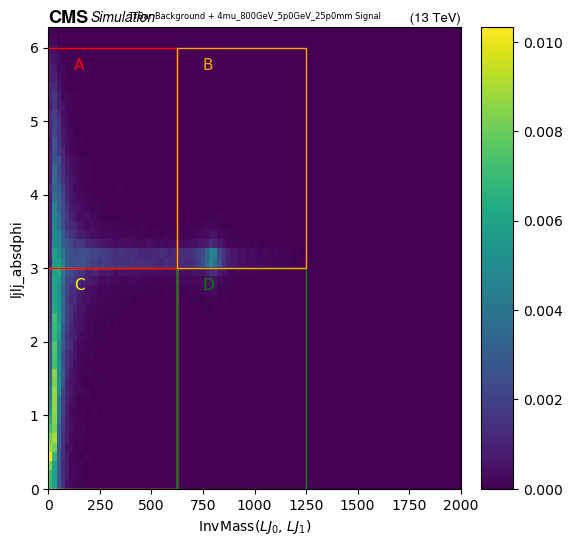

In [16]:
ind = -2
a = out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["baseNoLj", :, :]
b = out[samples[ind]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["baseNoLj", :, :]
c = addHistDensities(a, b, scalar = 0.33)
#X, Y = numpy.meshgrid(c[1], c[2])
#Z = c[0]
#print(c[0])
#print(c[0])

fig, (ax) = plt.subplots(1,1,figsize=(6,6))

utilities.plot(c, flow=False)

counts = ABCD(c, fig, ax, x0, x1)
ax.set_title(f"TTBar Background + {samples[ind]} Signal")
ax.title.set_size(6)
#fig.colorbar(t, ax=ax)
plt.show()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f5eae30c8b0>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f5ec5641c40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f5ec499c580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

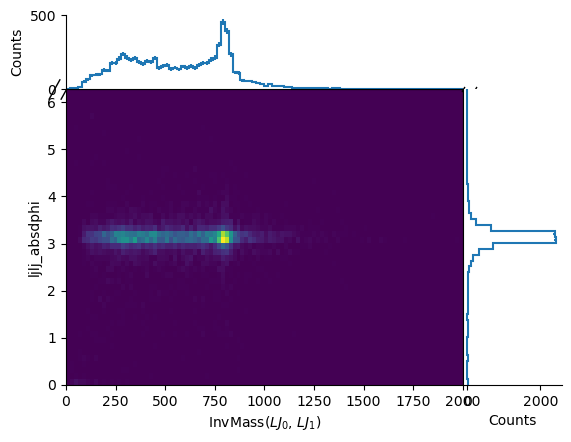

In [17]:
out[samples[-1]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :].plot2d_full()

Text(0.5, 1.0, '4mu_800GeV_5p0GeV_50p0mm')

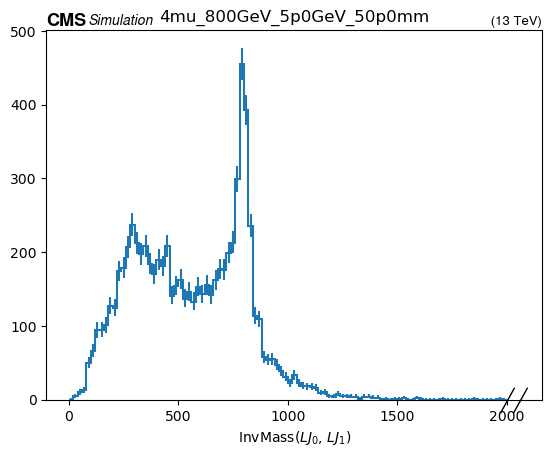

In [18]:
utilities.plot(out[samples[-1]]["hists"]["lj_lj_invmass"]["base", :])
plt.title(samples[-1])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f5eaf153100>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

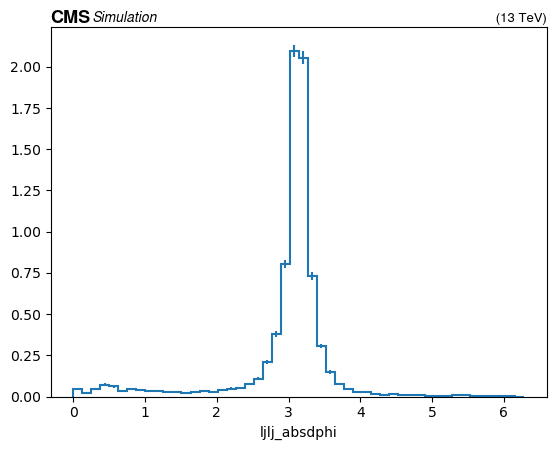

In [19]:
utilities.plot(out[samples[-1]]["hists"]["lj_lj_absdphi"]["baseNoLj", :], flow='none', density=True)

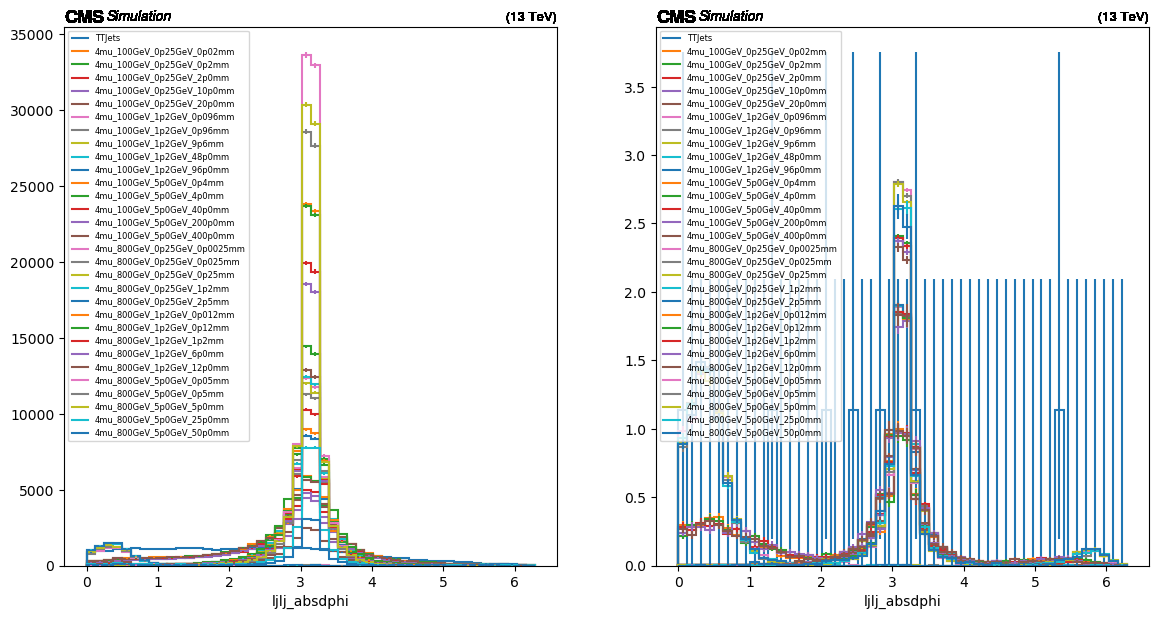

In [20]:
plt.subplots(1,2,figsize=(14,7))
plt.subplot(1,2,1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"]["baseNoLj", :], flow='none', density=False)
plt.legend(samples, loc=2, prop={'size': 6})
plt.subplot(1,2,2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"]["4mu", :], flow='none', density=True)
plt.legend(samples, loc=2, prop={'size': 6})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

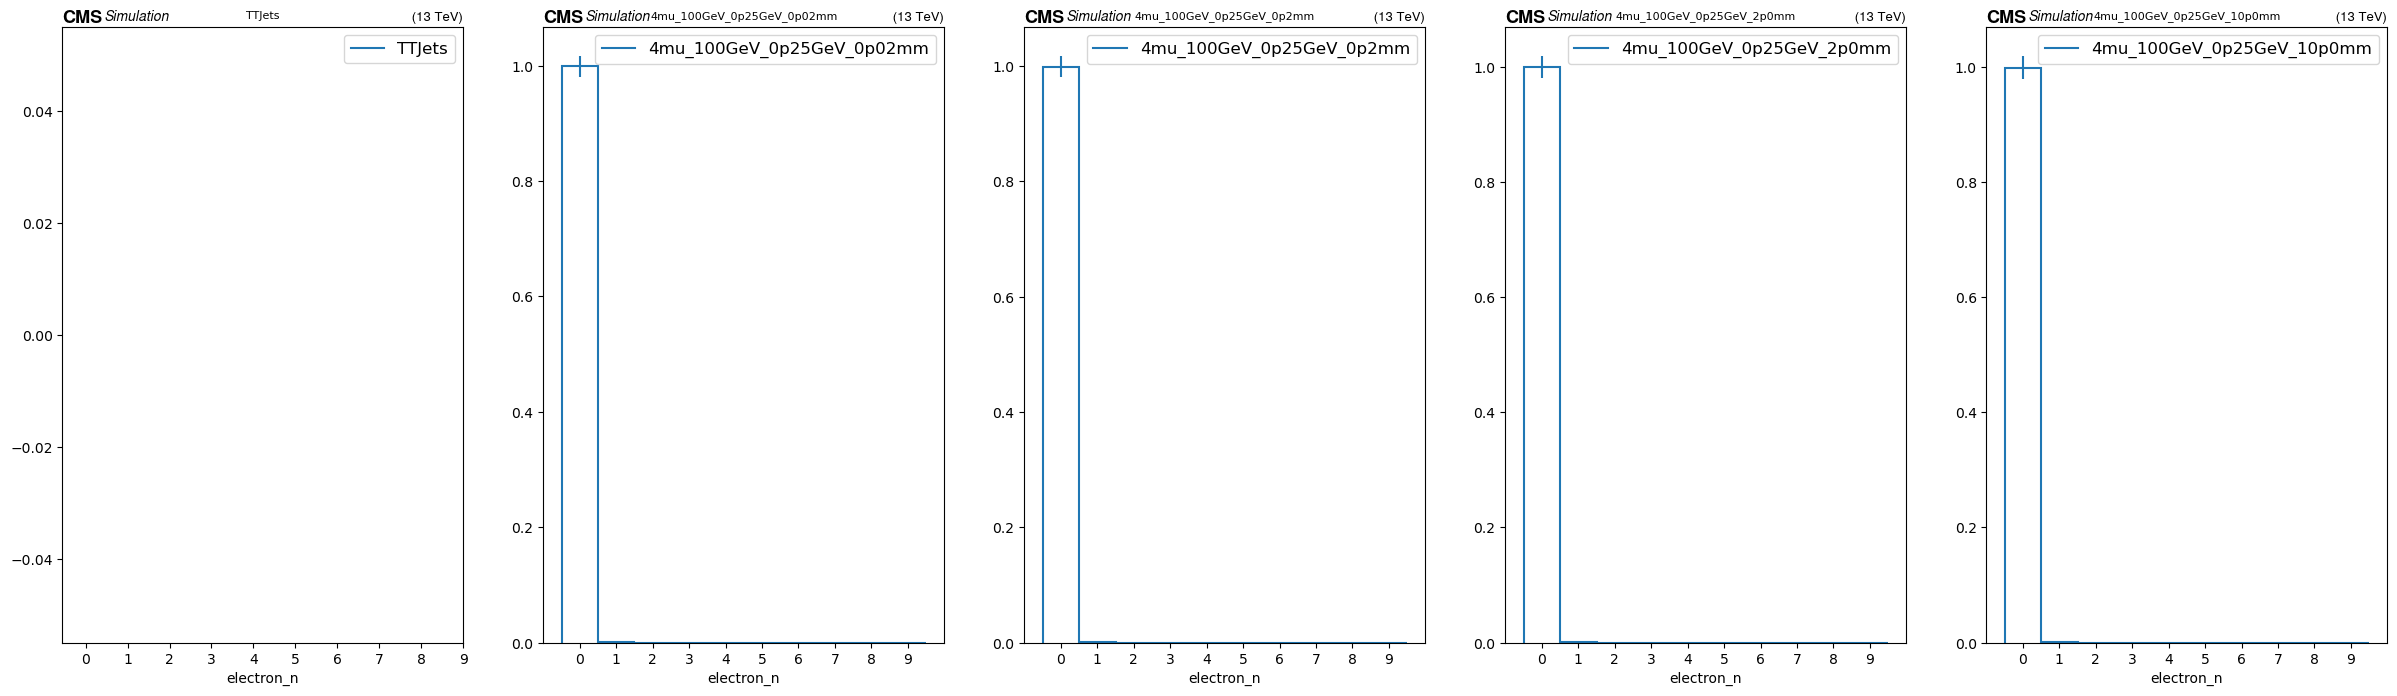

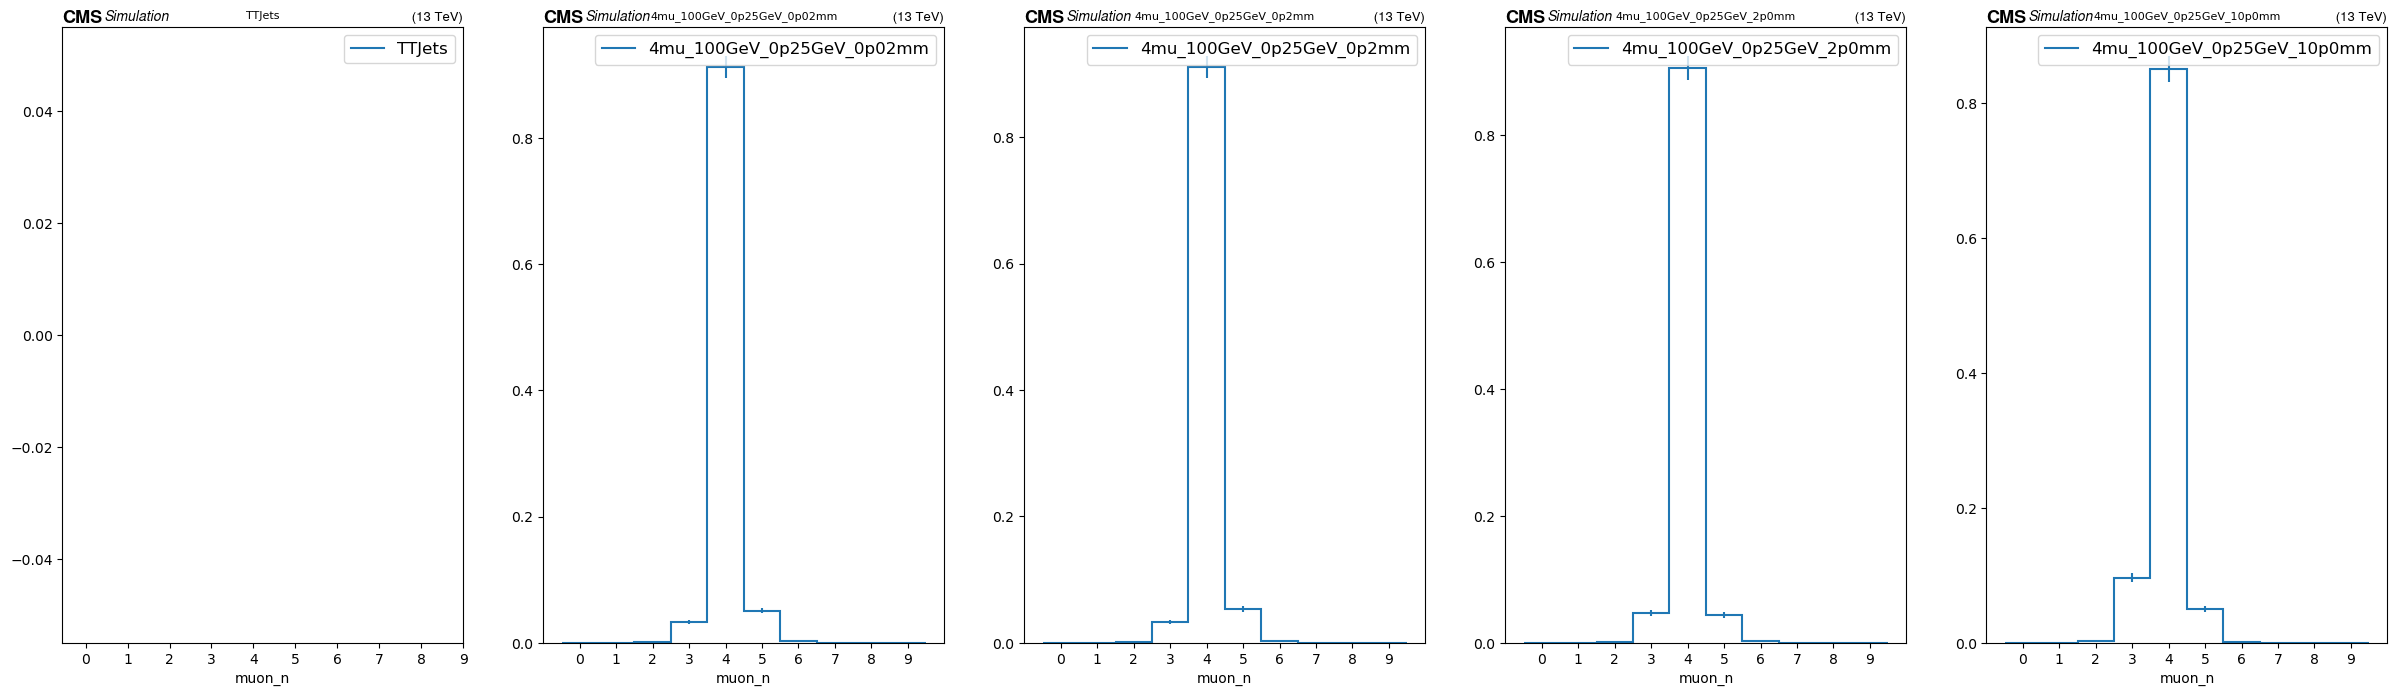

In [21]:
histlist = ["electron_n", "muon_n"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

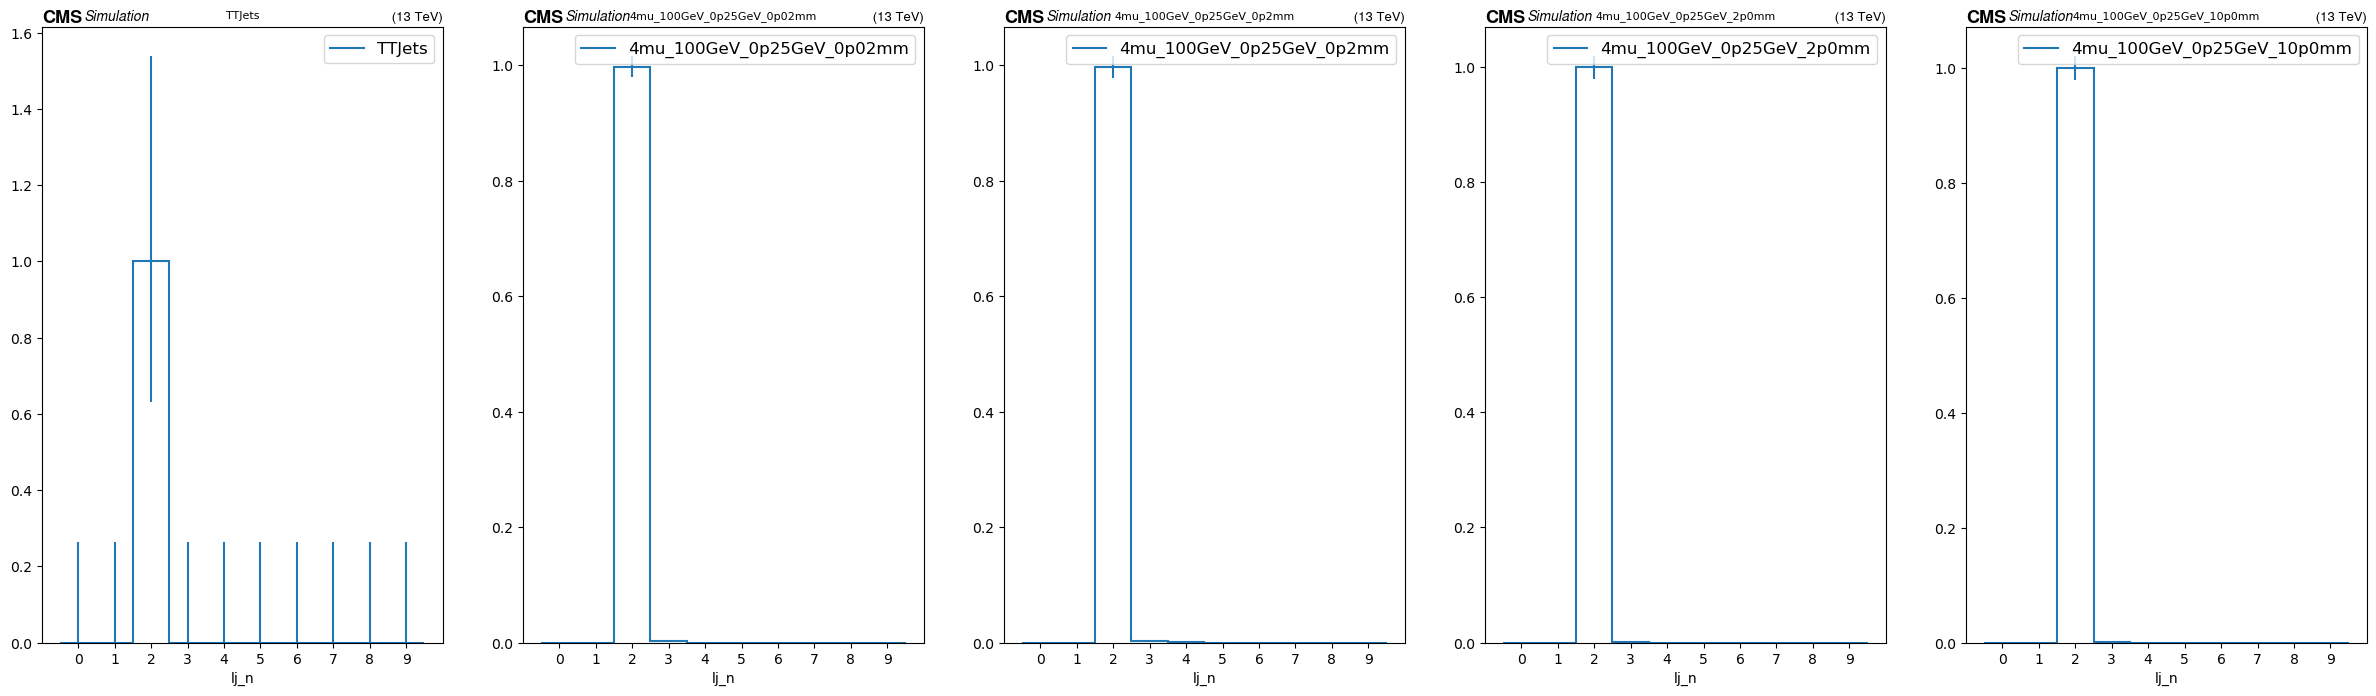

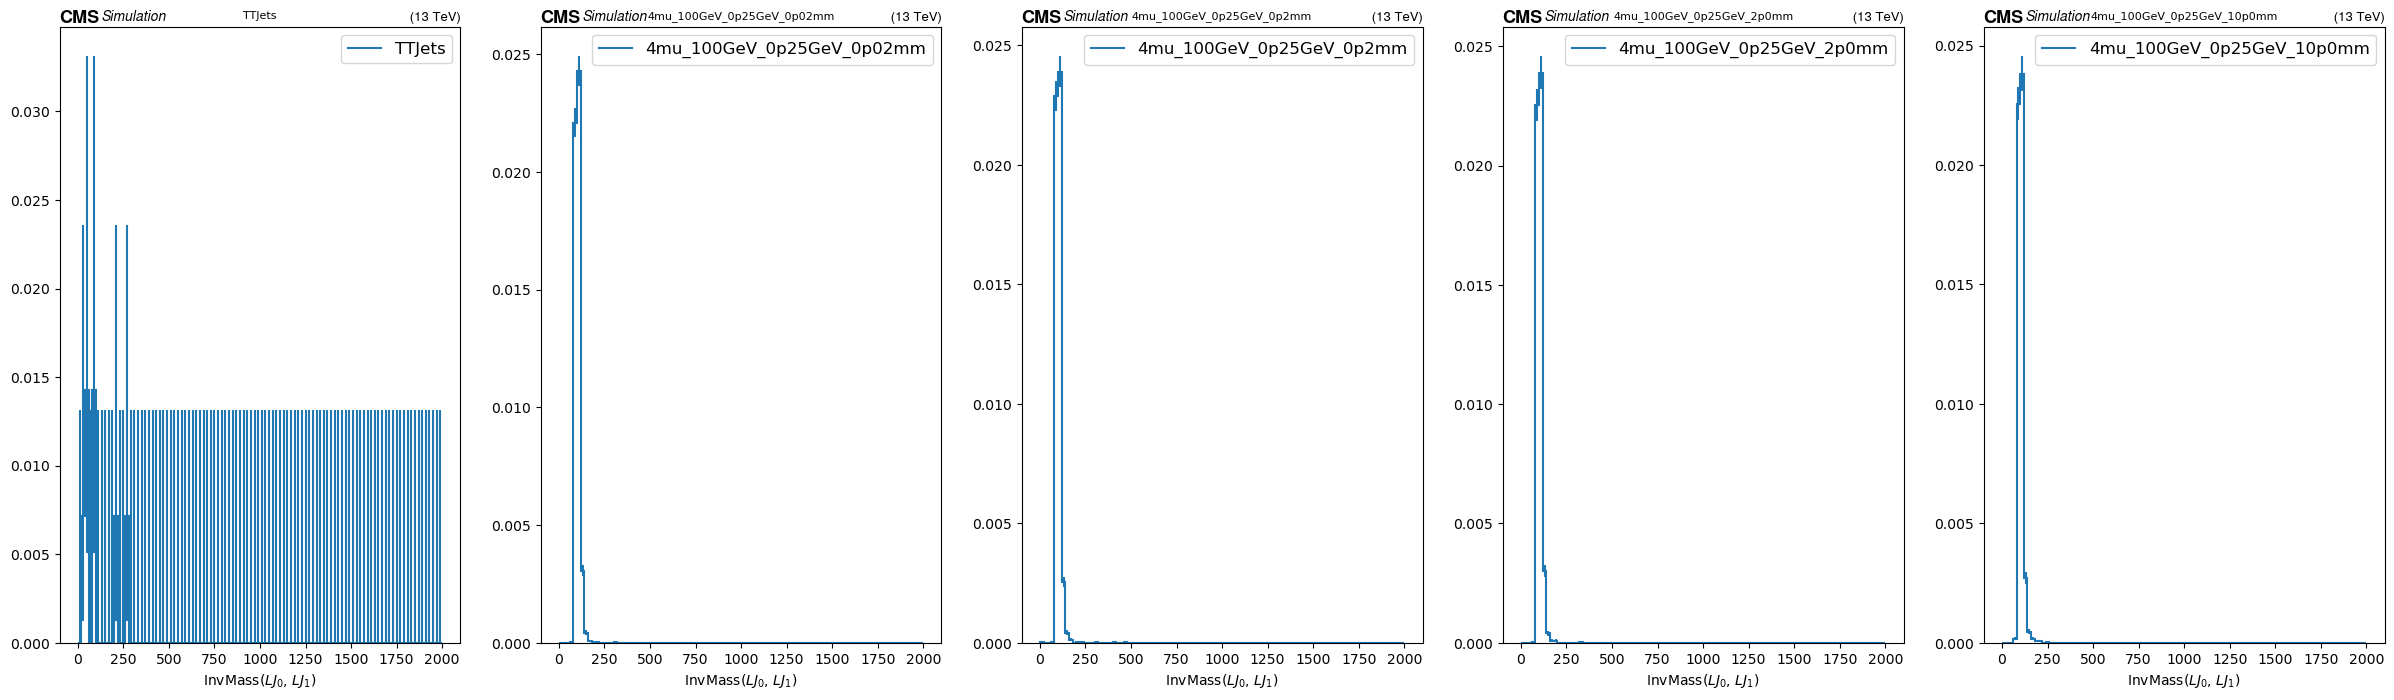

In [22]:
histlist = ["lj_n", "lj_lj_invmass"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["4mu", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

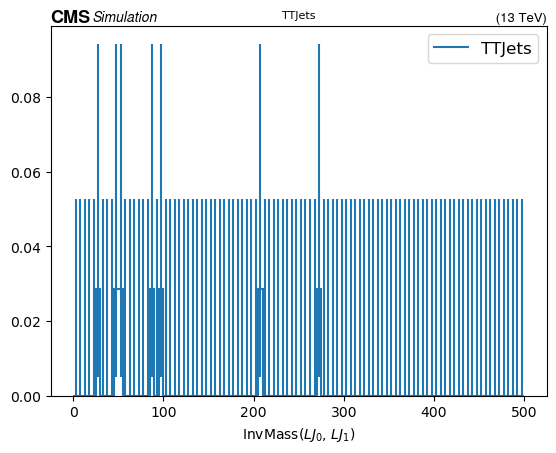

In [23]:
hist = "lj_lj_invmass_lowRange"

utilities.plot(out[samples[0]]["hists"][hist]["4mu", :], density=True)
plt.title(samples[0], size=8)
plt.legend([samples[0]], prop={"size": 12})

In [24]:
cutflow.print_multi_table([out[sample]["cutflow"]["4mu_matchedLj"] for sample in samples], [sample for sample in samples], fraction=False)
# the matched As are gen-level particles, so none are present in TTJets


cut name          Total cuts:                  Total cuts:                 Total cuts:                 Total cuts:                  Total cuts:                  Total cuts:                  Total cuts:                 Total cuts:                Total cuts:                 Total cuts:                 Total cuts:                Total cuts:                Total cuts:                 Total cuts:                  Total cuts:                  Total cuts:                    Total cuts:                   Total cuts:                  Total cuts:                 Total cuts:                 Total cuts:                  Total cuts:                 Total cuts:                Total cuts:                Total cuts:                 Total cuts:                 Total cuts:                Total cuts:                Total cuts:                 Total cuts:                 Total cuts:
                        TTJets    4mu_100GeV_0p25GeV_0p02mm    4mu_100GeV_0p25GeV_0p2mm    4mu_100GeV_0p25GeV_2p0mm    4mu_

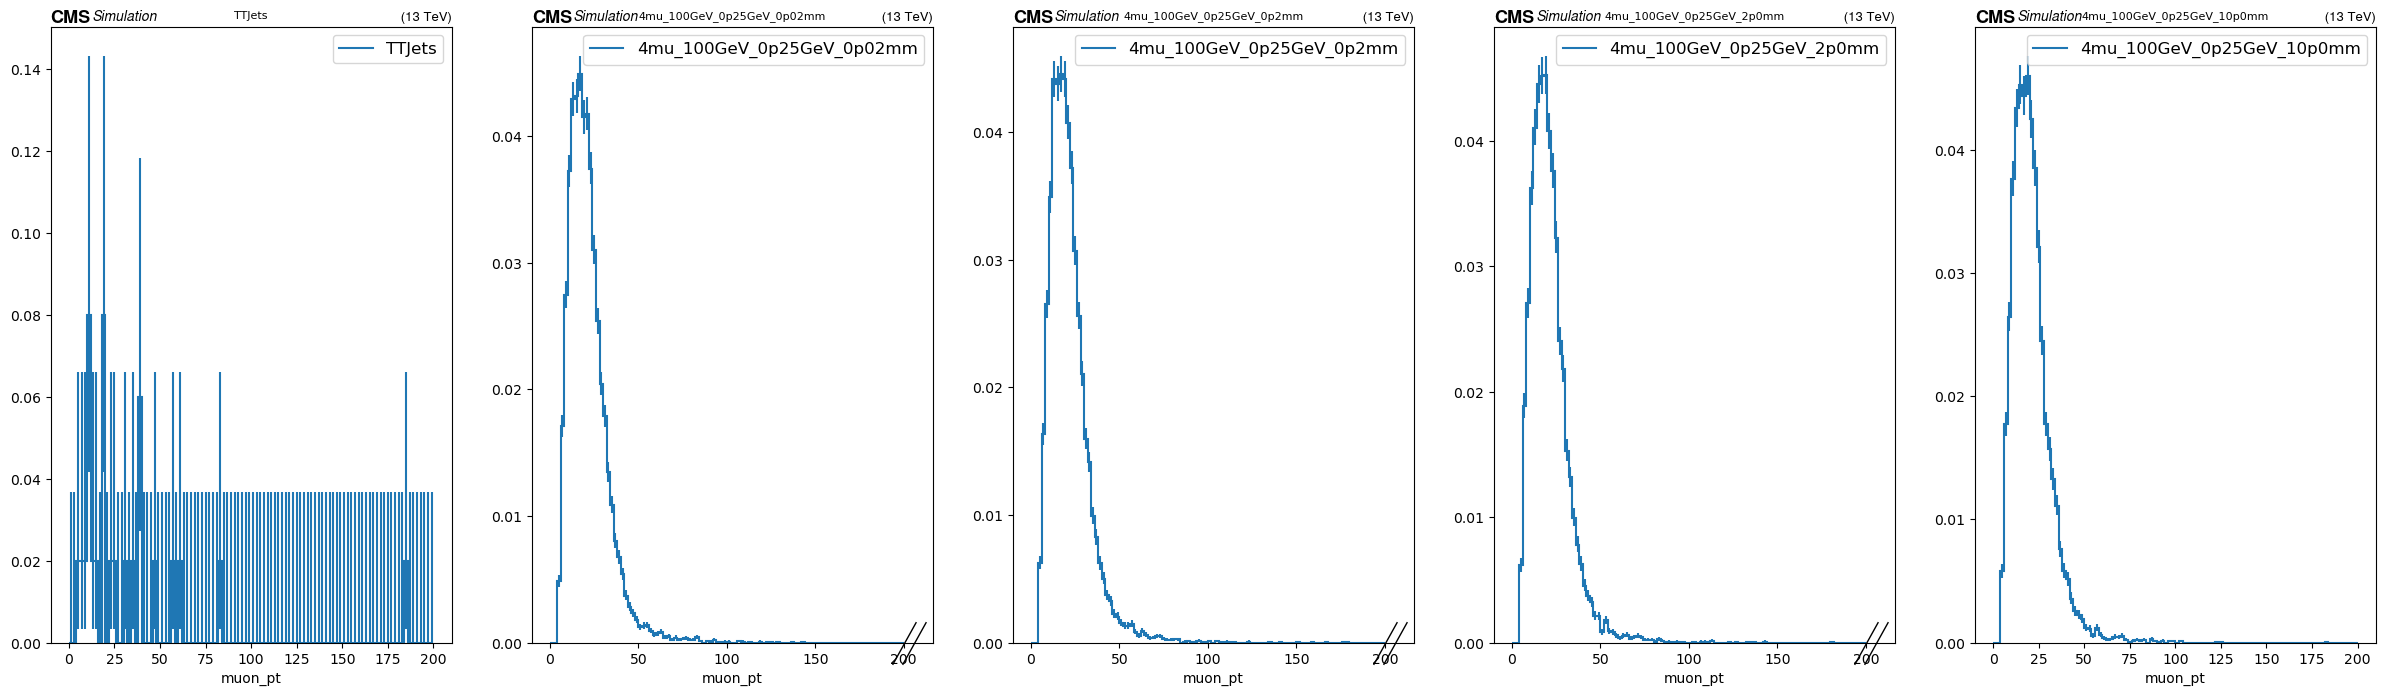

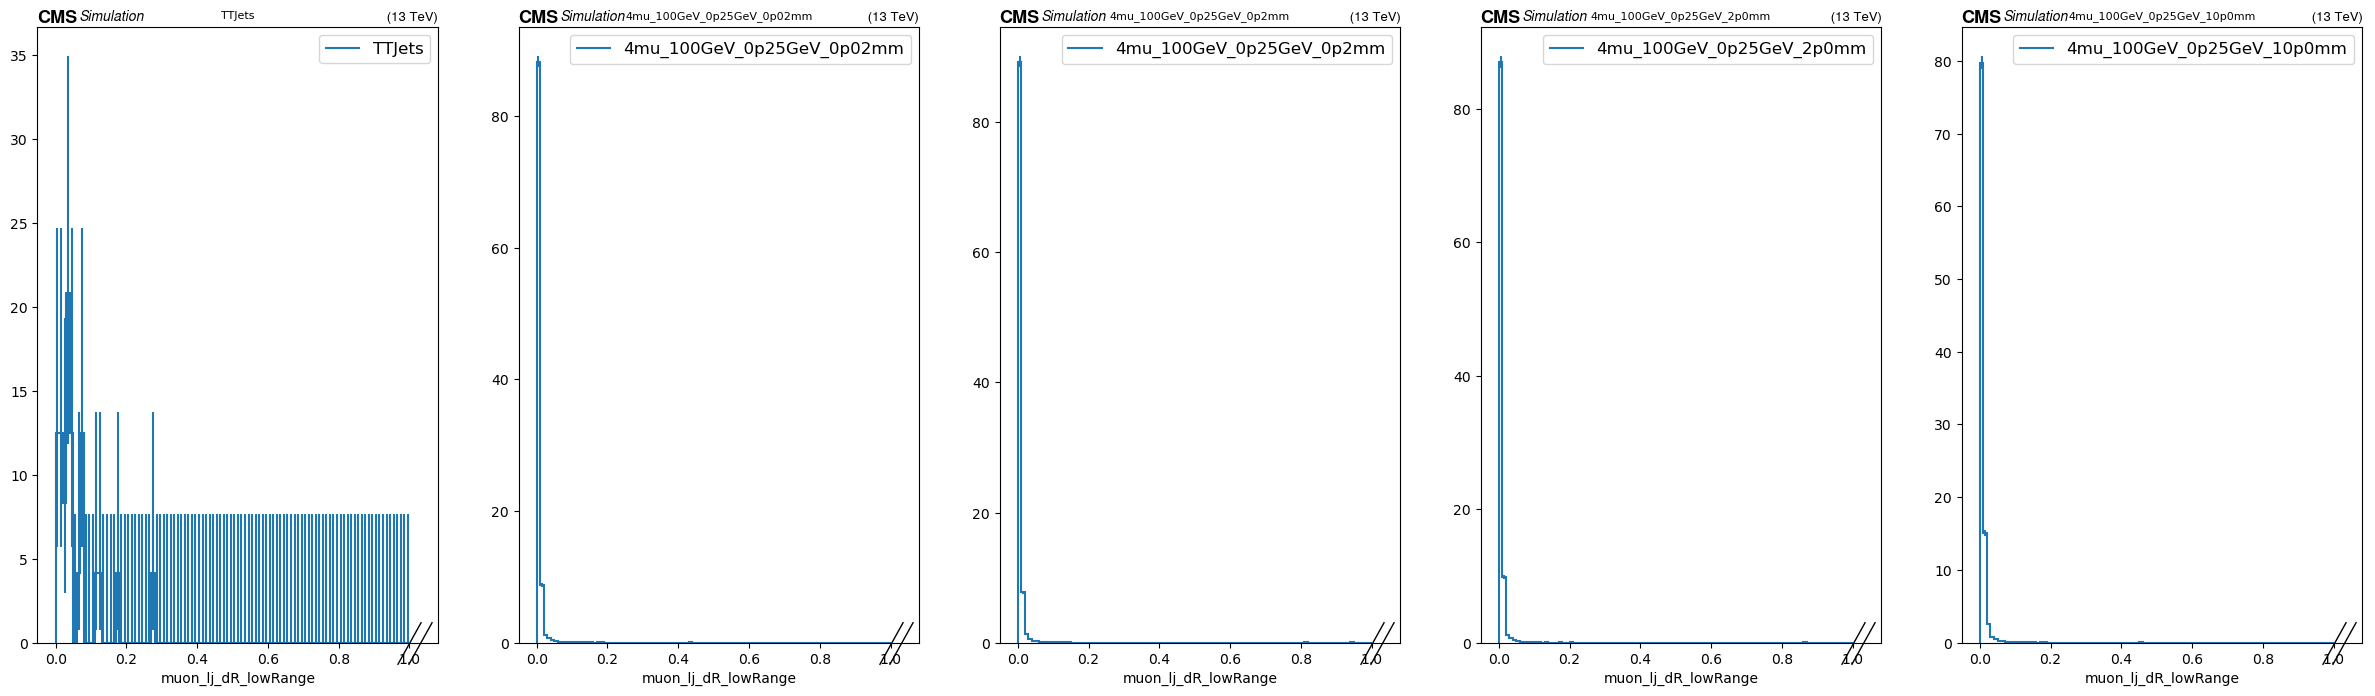

In [25]:
histlist = ["muon_pt", "muon_lj_dR_lowRange"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["4mu", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

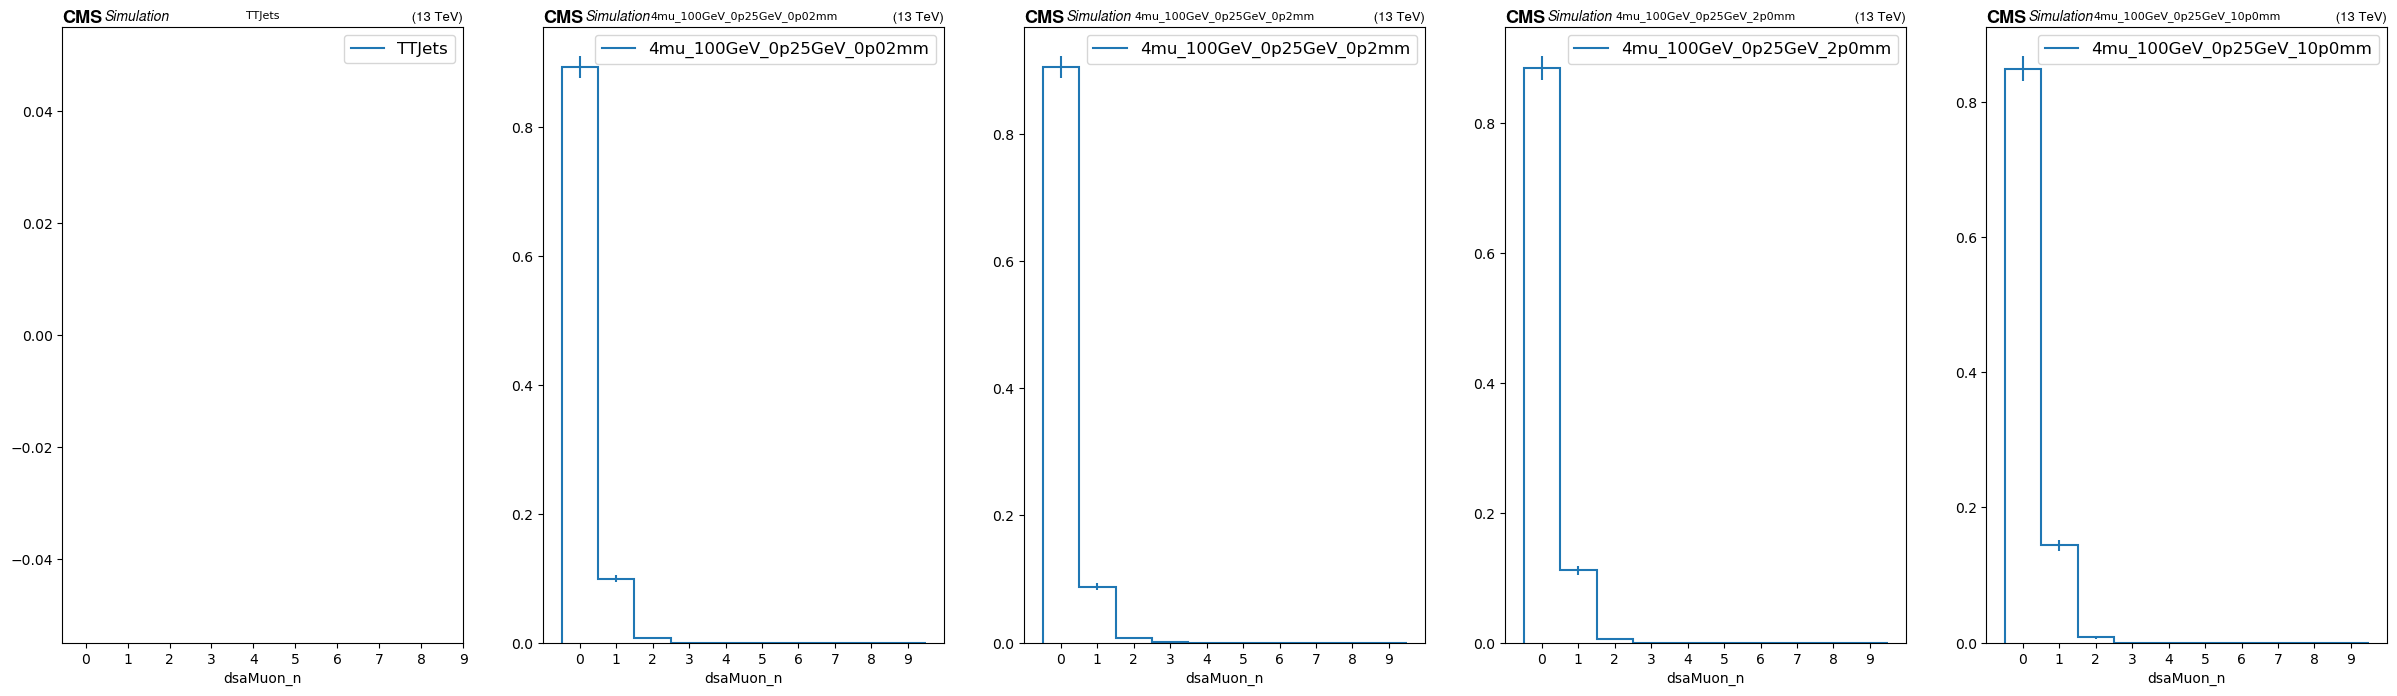

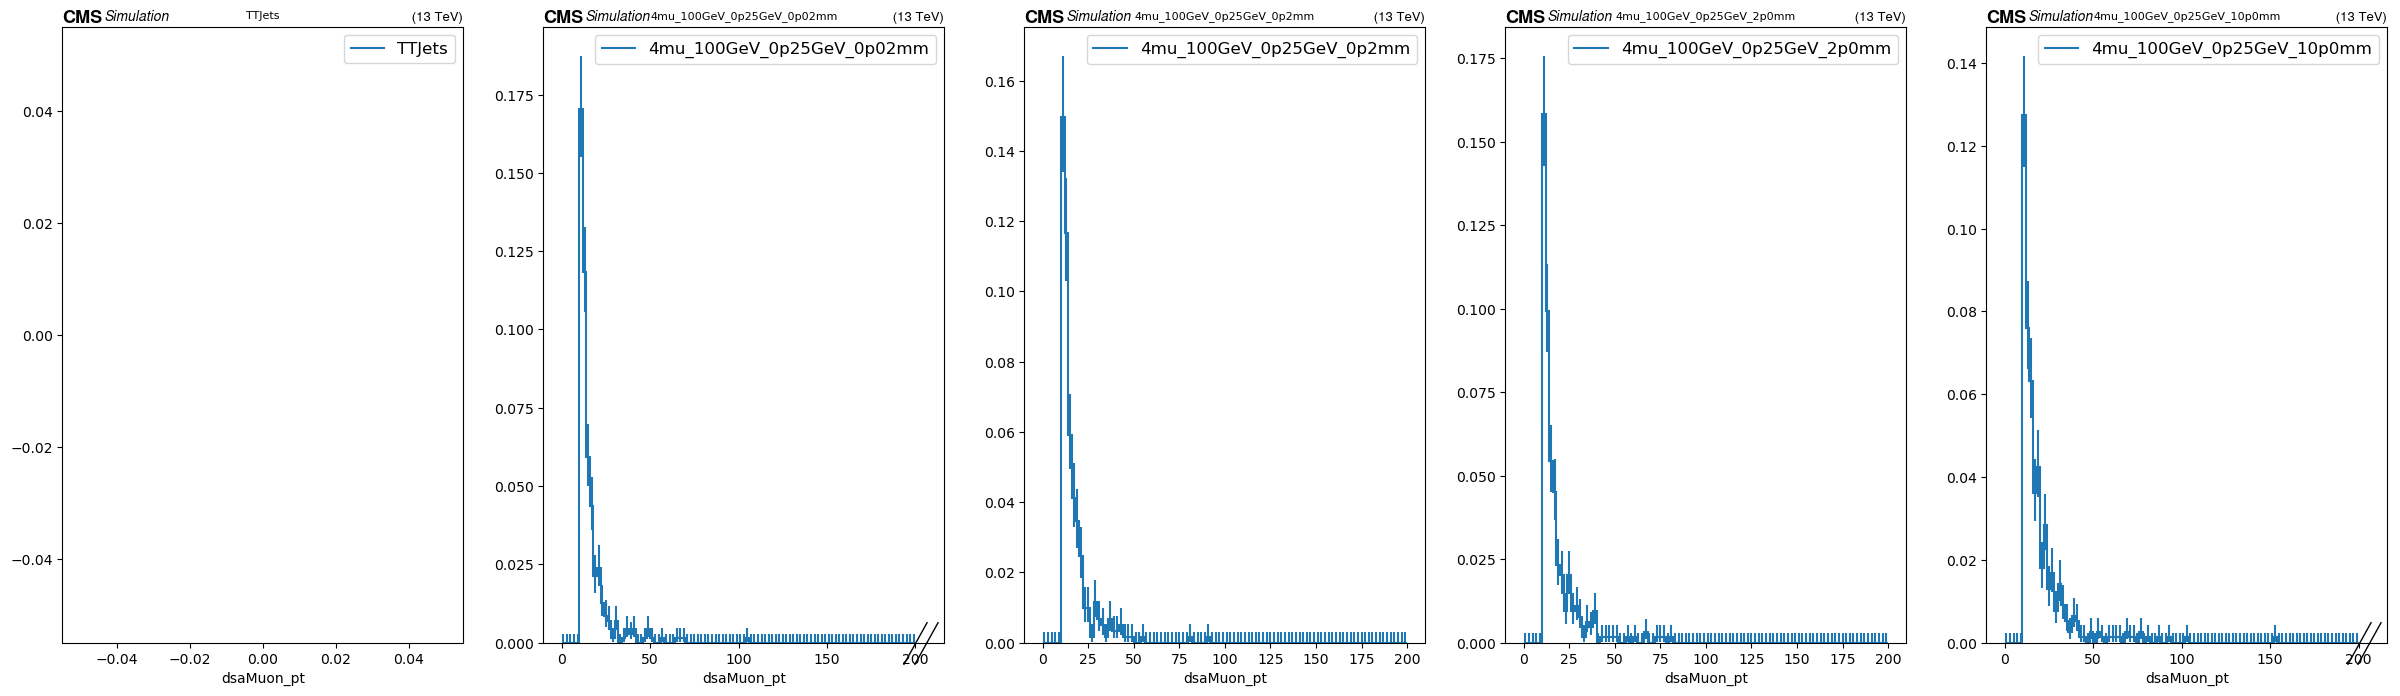

In [26]:
histlist = ["dsaMuon_n", "dsaMuon_pt"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

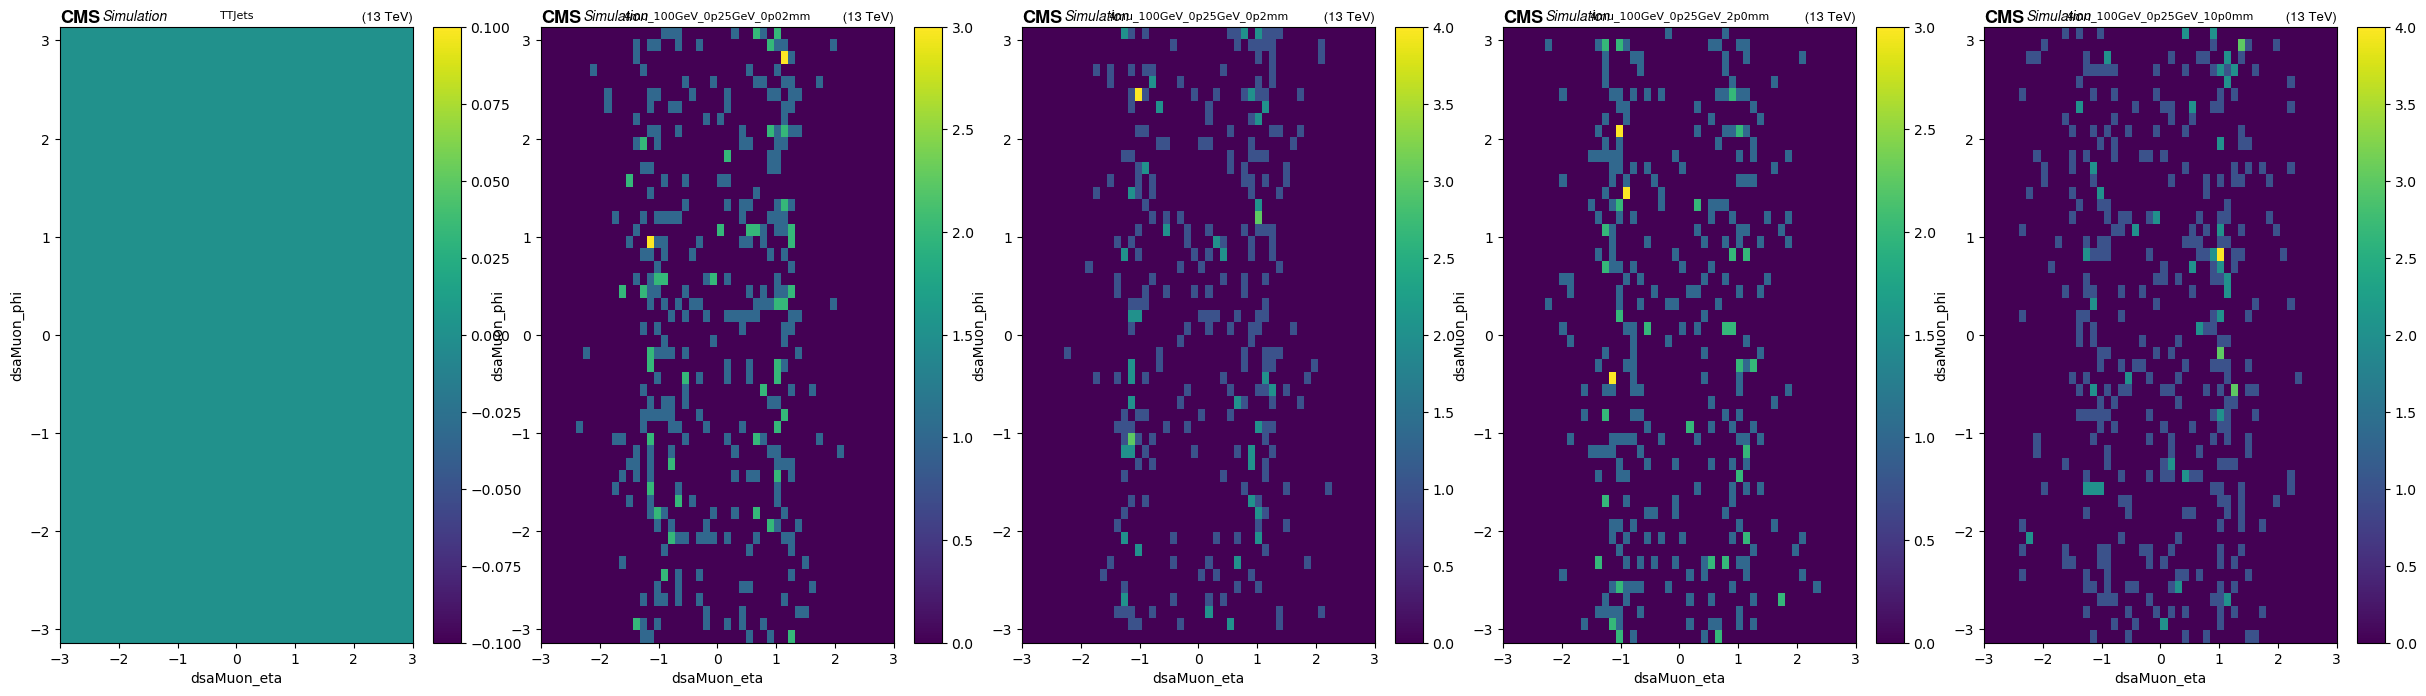

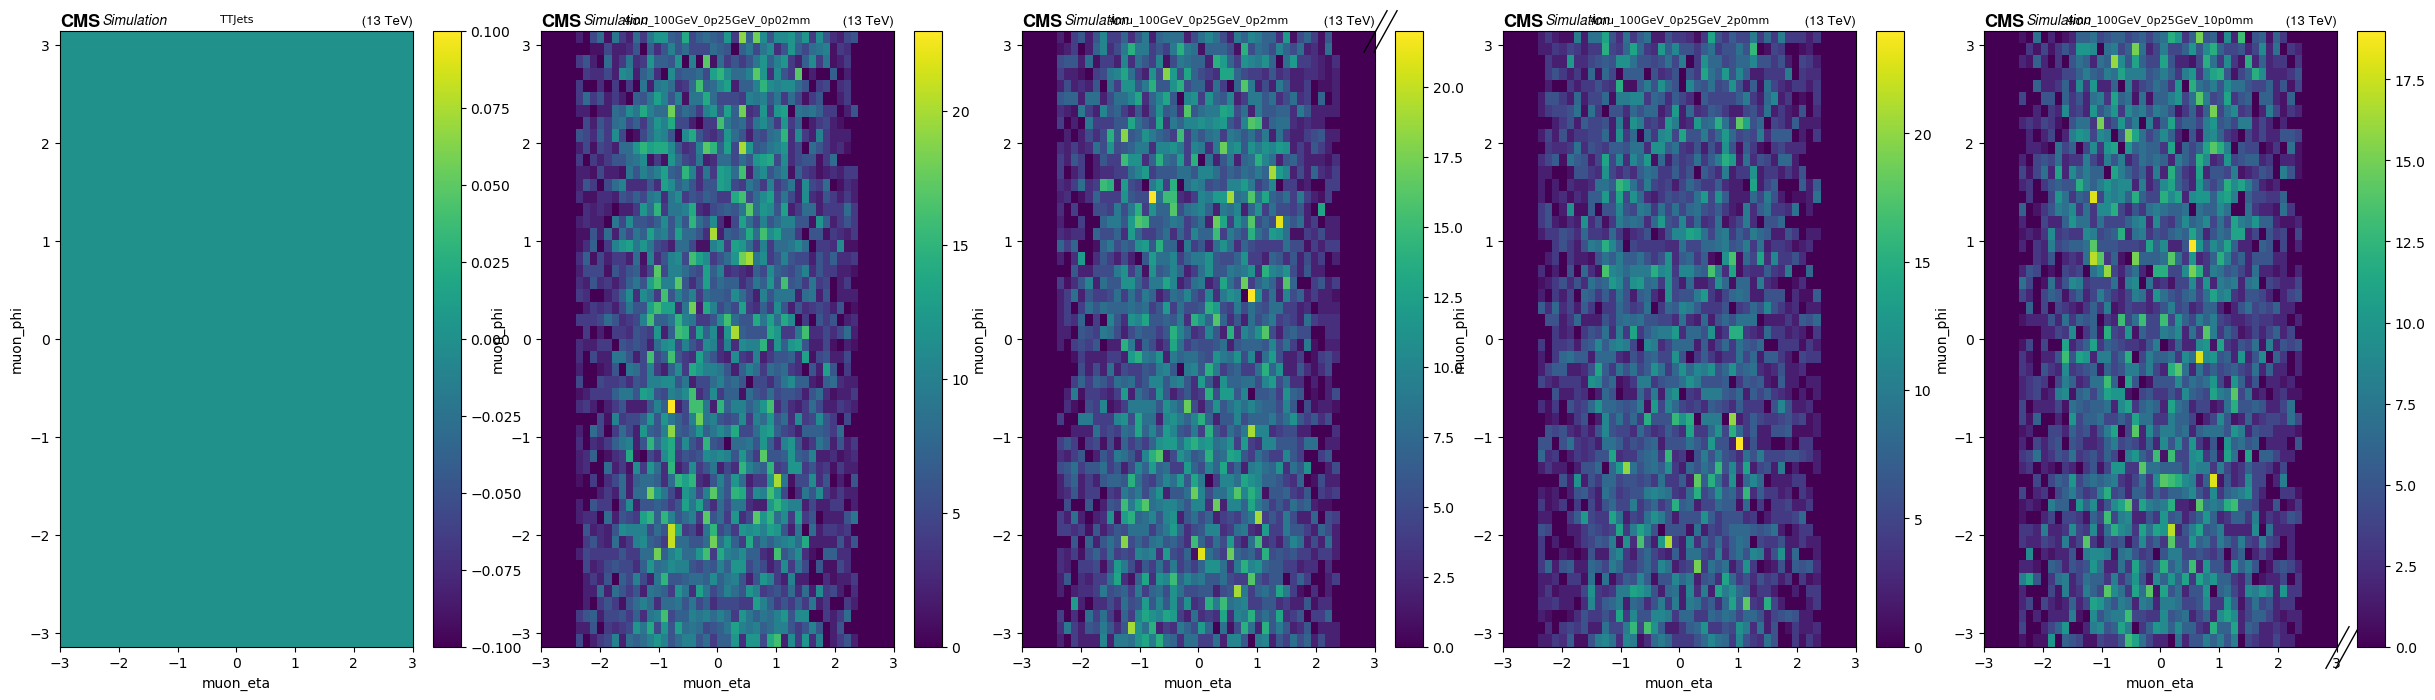

In [27]:
histlist = ["dsaMuon_eta_phi", "muon_eta_phi"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :, :])
        plt.title(samples[i], size=8)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

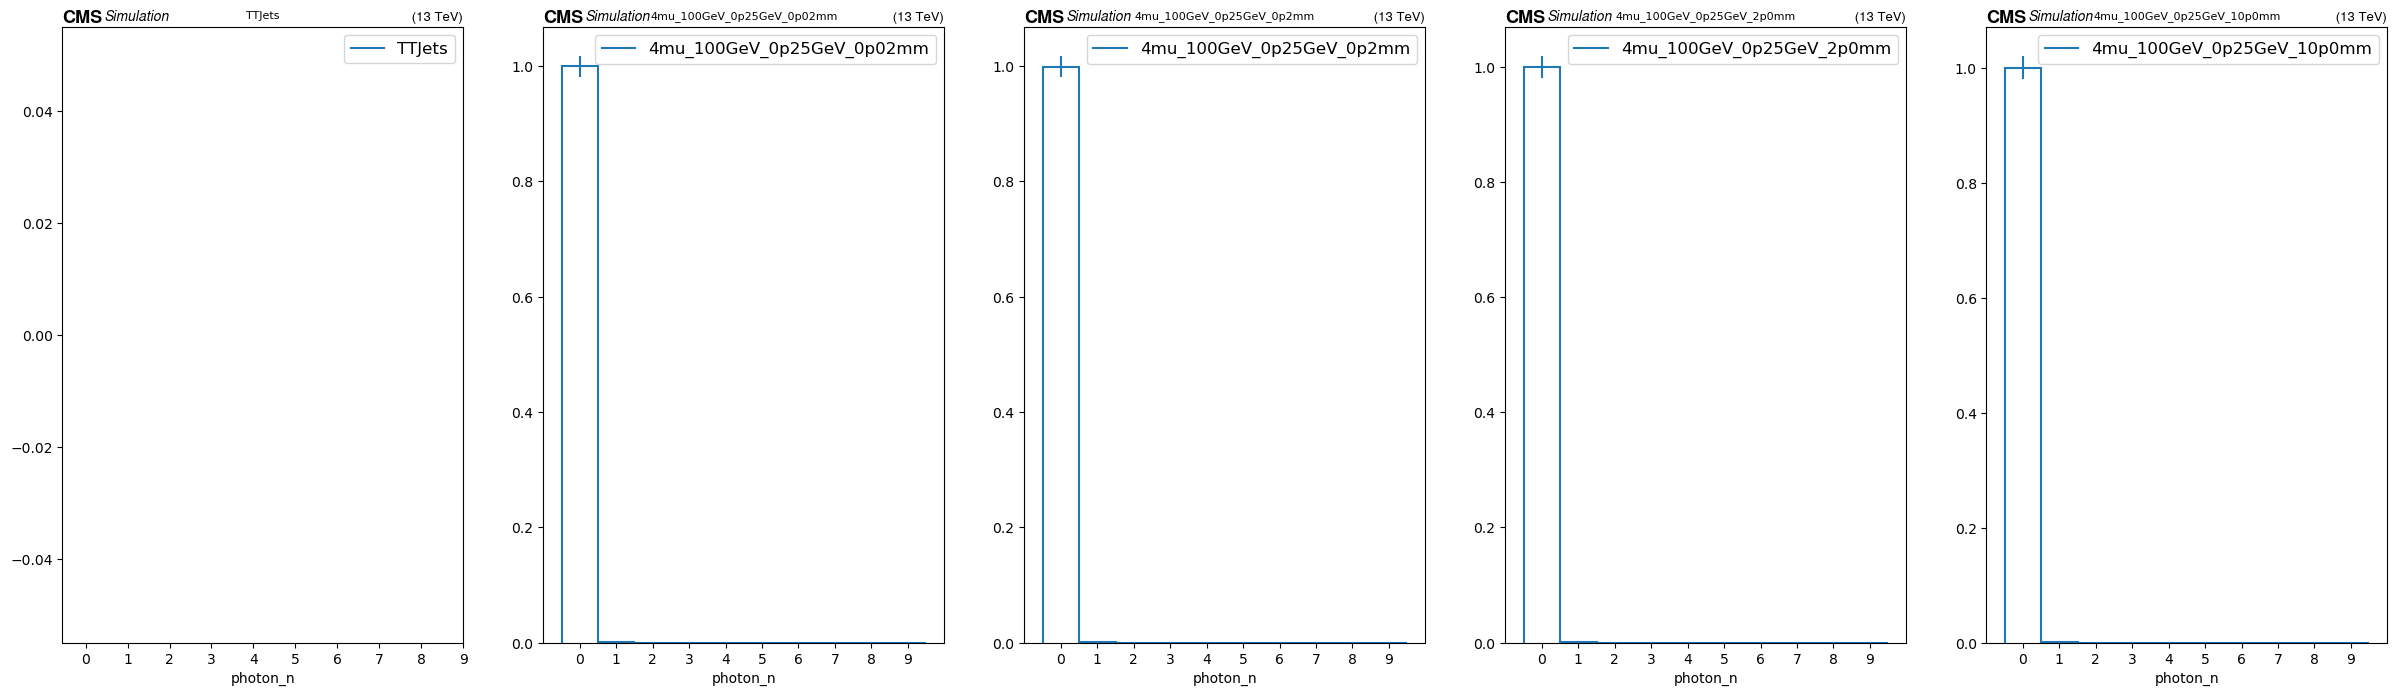

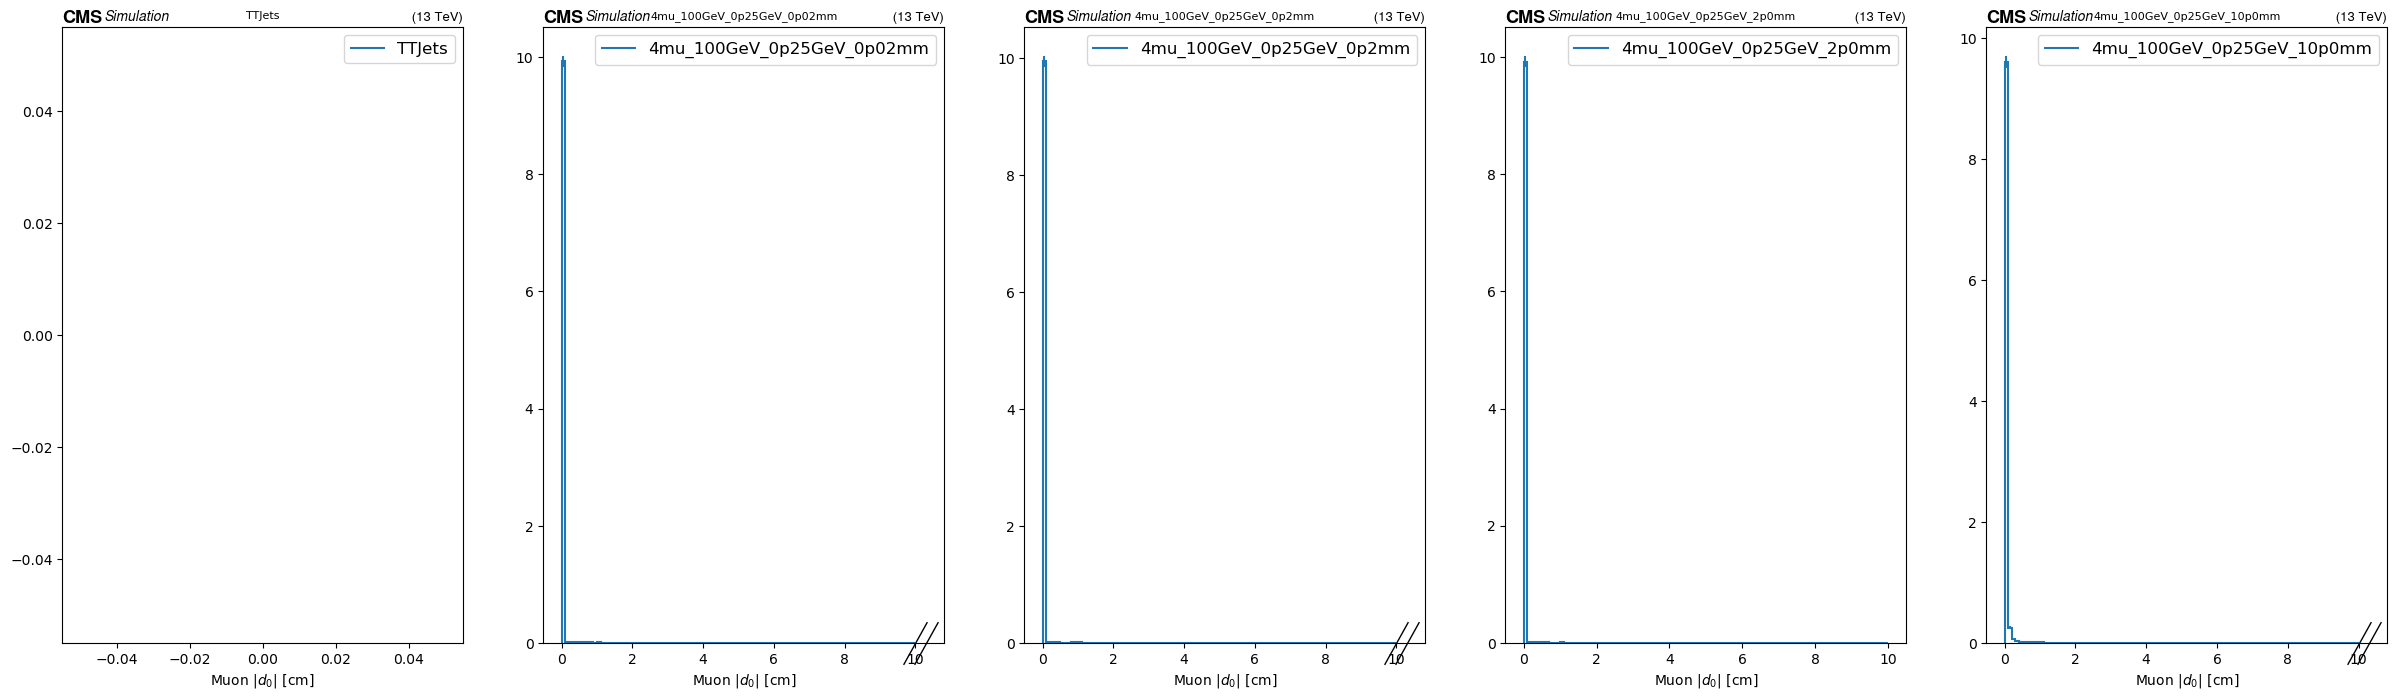

In [28]:
histlist = ["photon_n", "muon_absD0_lowRange"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

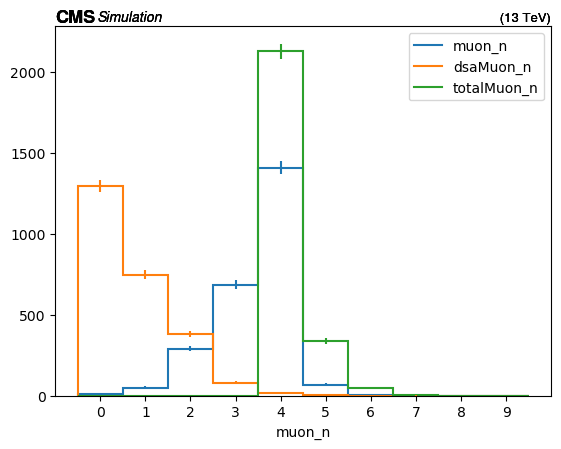

In [29]:
histlist = ["muon_n","dsaMuon_n","totalMuon_n"]
for hist in histlist:
    utilities.plot(out[samples[-1]]["hists"][hist]["4mu_matchedLj", :], density=False)
plt.legend(histlist)